# Project Name :  Concrete Compressive Strength Prediction using DL Auto Keras(Auto ML)

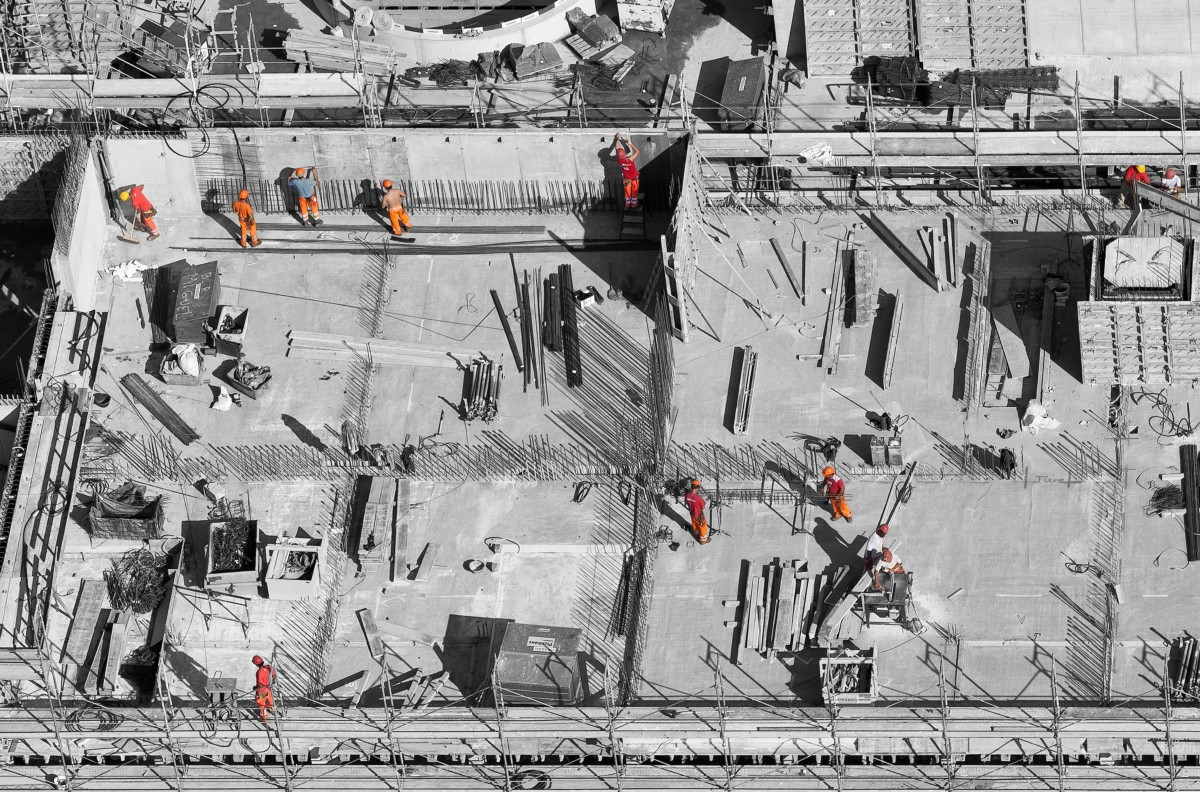

## Abstract

###  Concrete is the most important material in civil engineering. Theconcrete compressive strength is a highly nonlinear function of age andingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

## Data Characteristics

### The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.

## Time Line o fthe Project:
- Data Analysis
- Data Preprocessing
- Feature Engineering
- Model Building using DL
- Model Building using Auto Keras

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df = pd.read_csv("/home/kalyangopu/Documents/miniproject/concrete_data-1.csv")
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [7]:
df.shape

(1030, 9)

## Data Analysis

In [8]:
df.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.000000   
25%            0.000000        932.000000       730.950000     7.000000   
50%            6.400000        968.000000       779.500000    28.000000   
75%           10.200000       1029.400000       824.000000    56.000000   
max           32.200000       1145.000000       992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

### Heatmap

<Axes: >

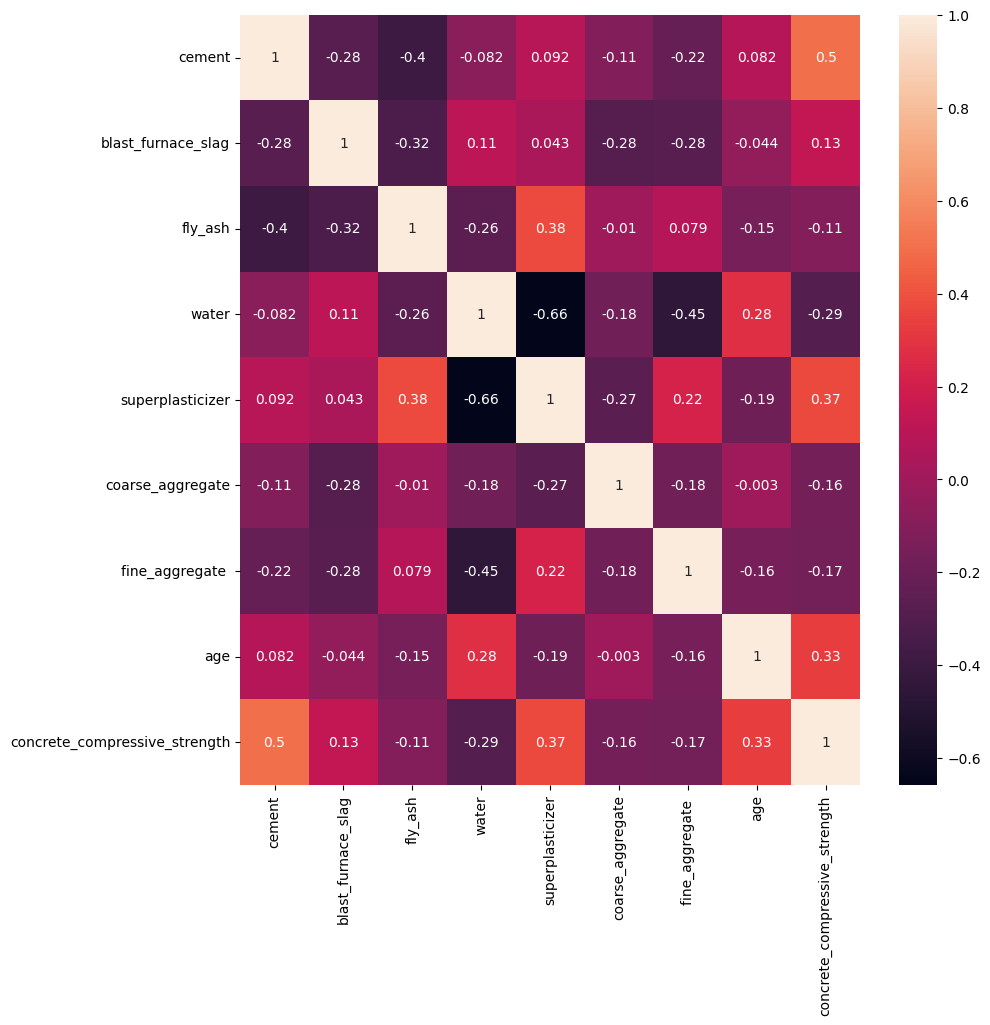

In [12]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

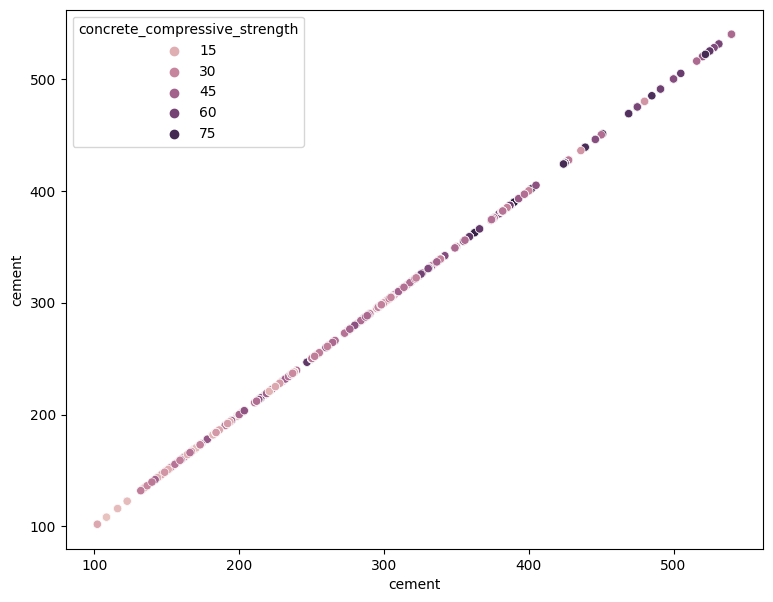

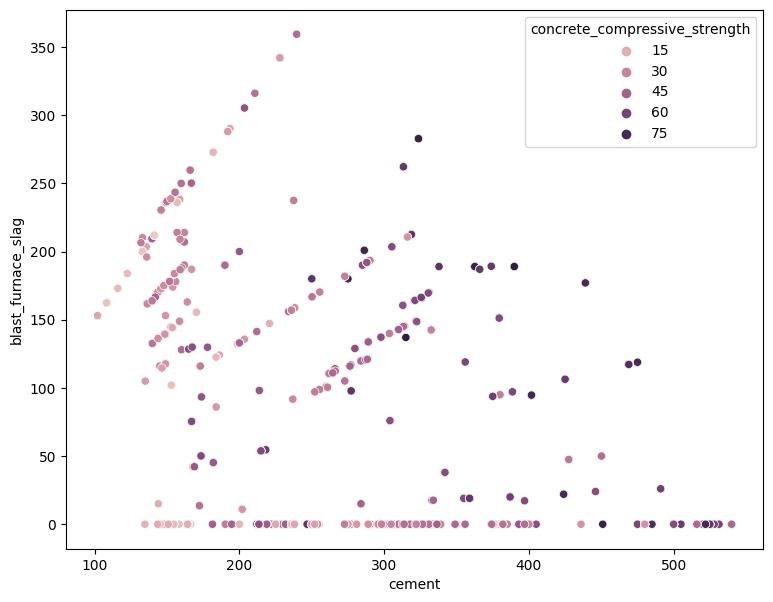

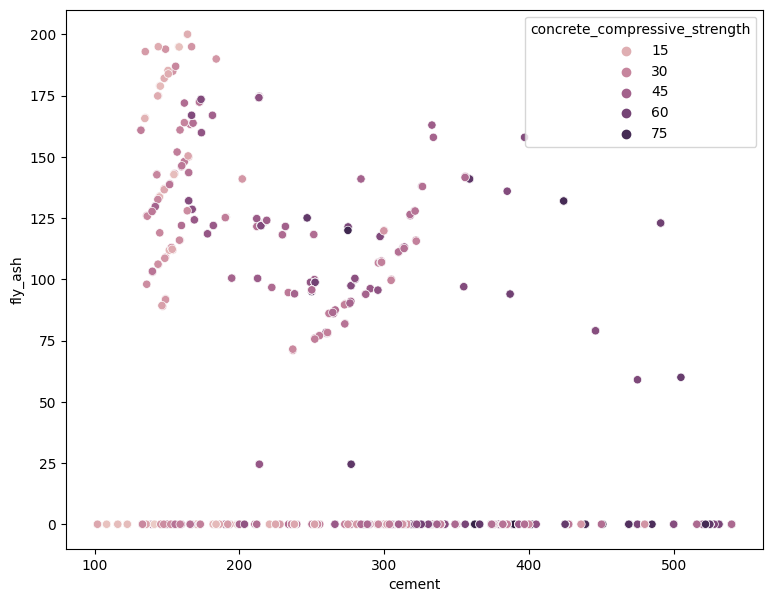

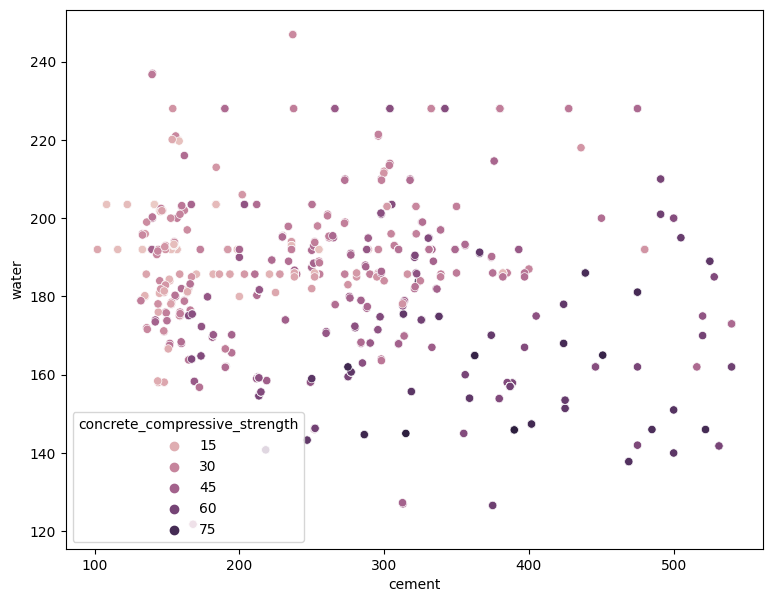

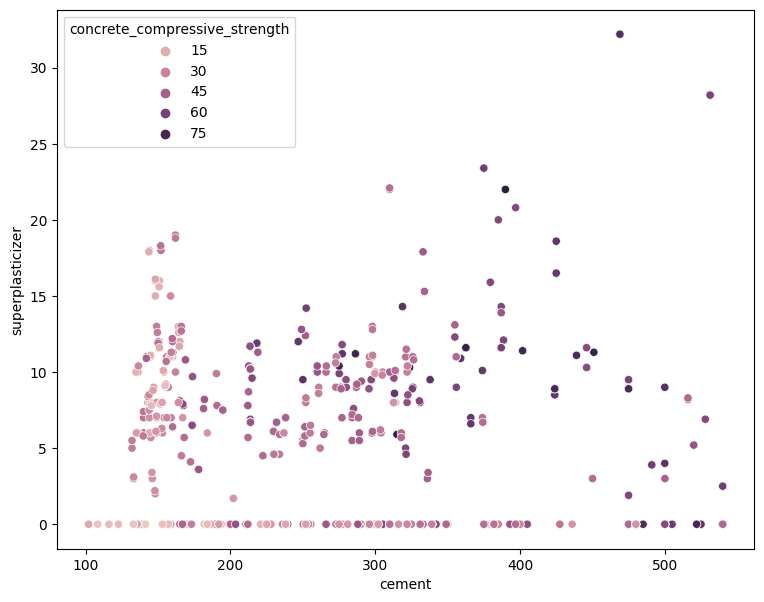

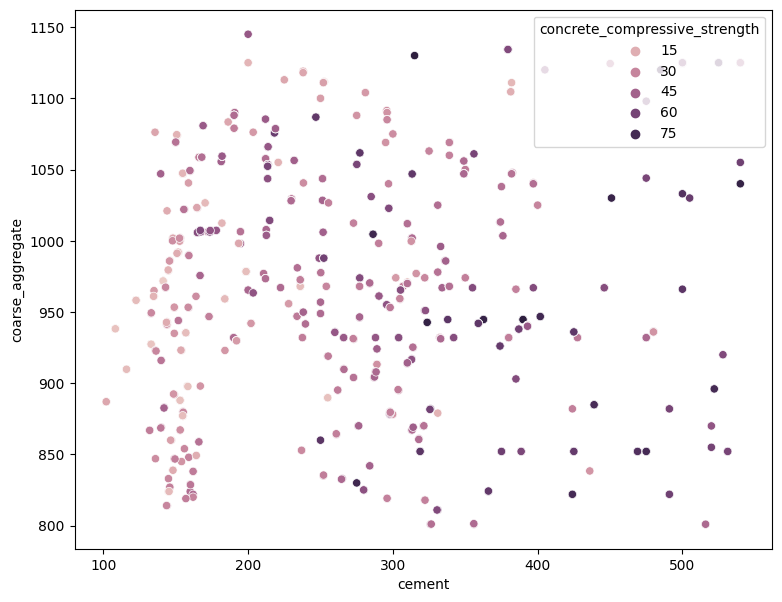

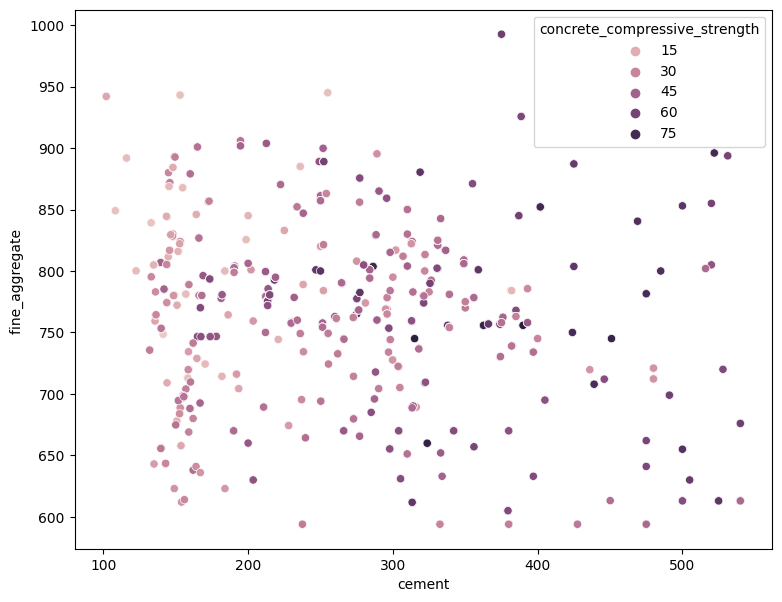

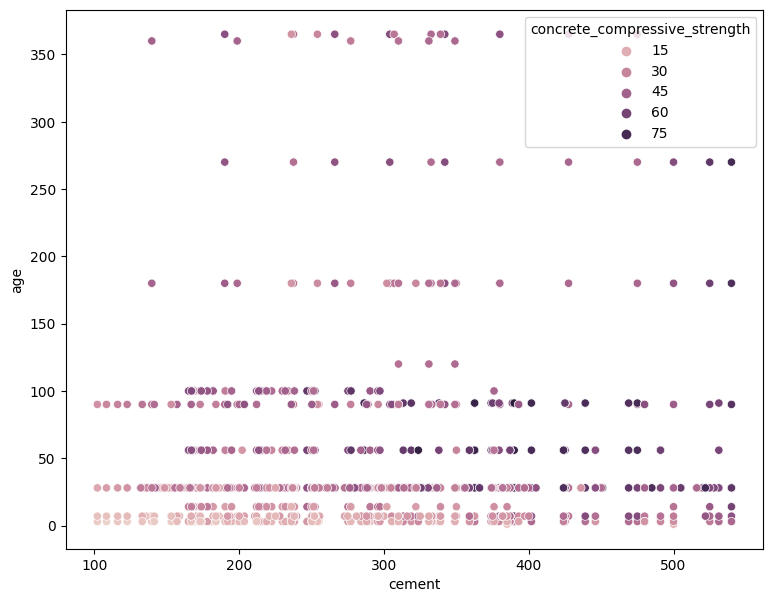

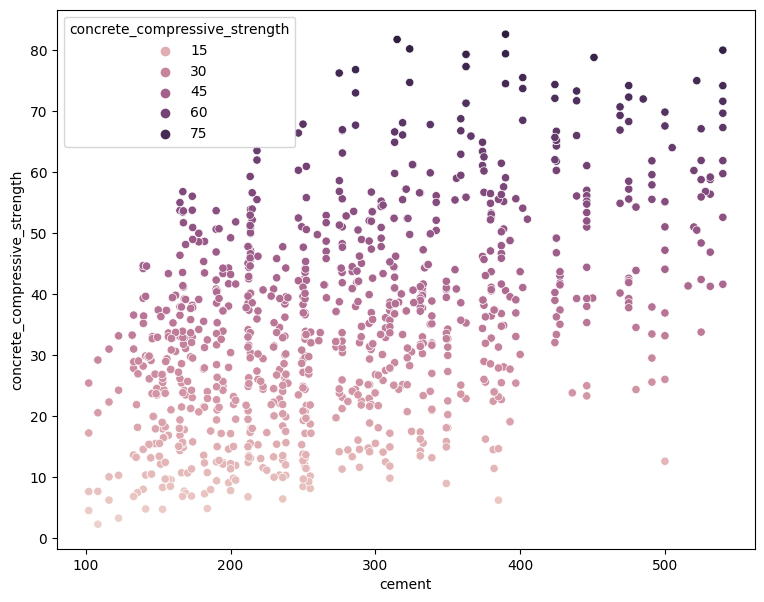

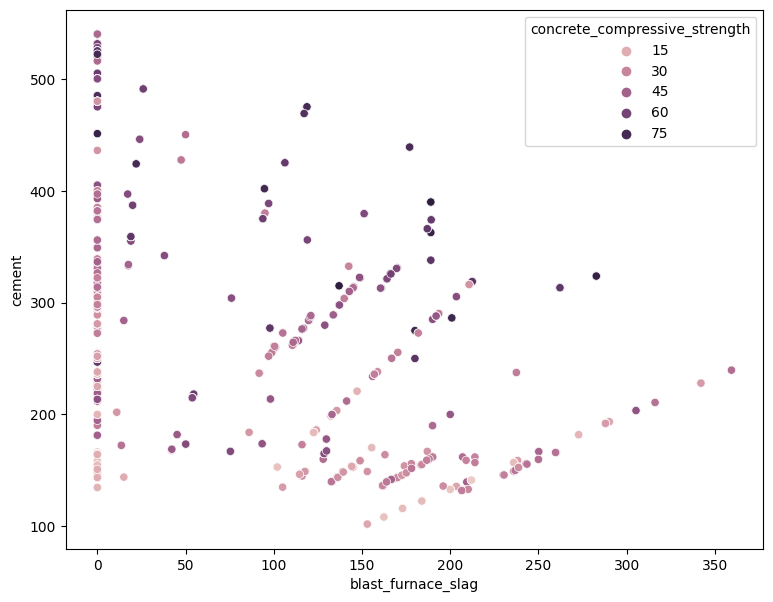

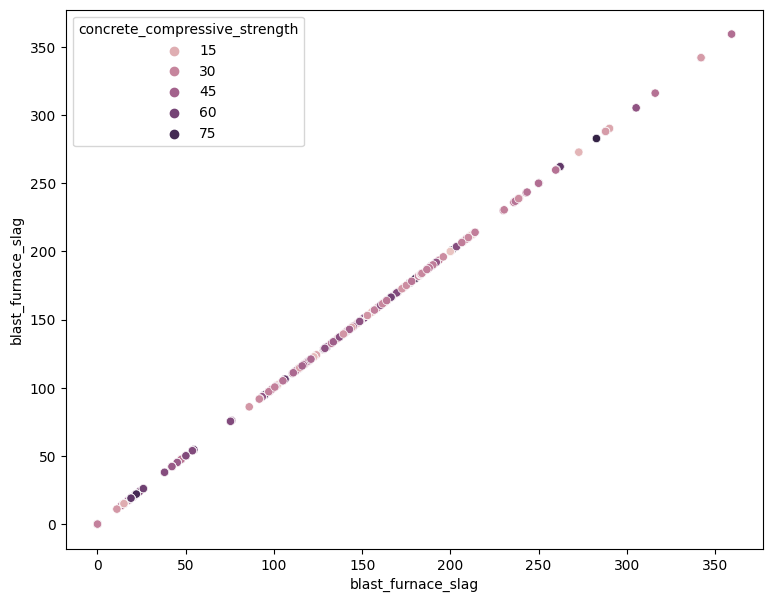

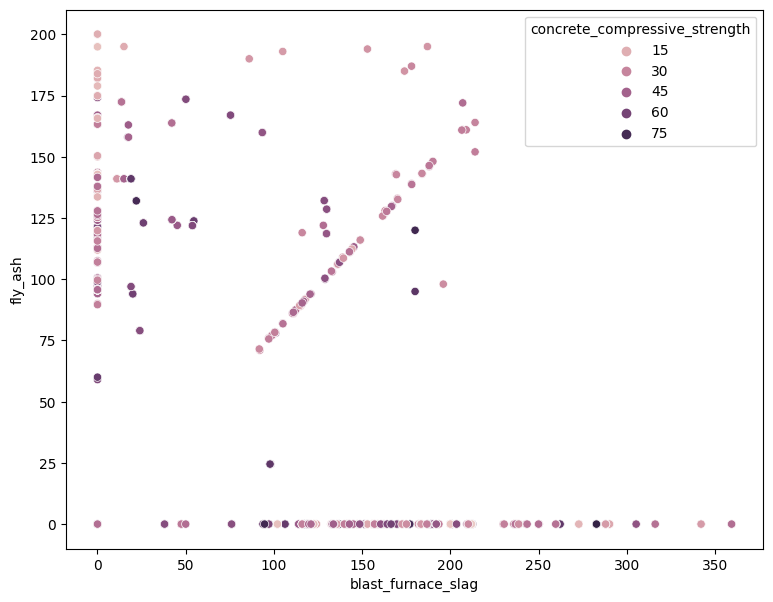

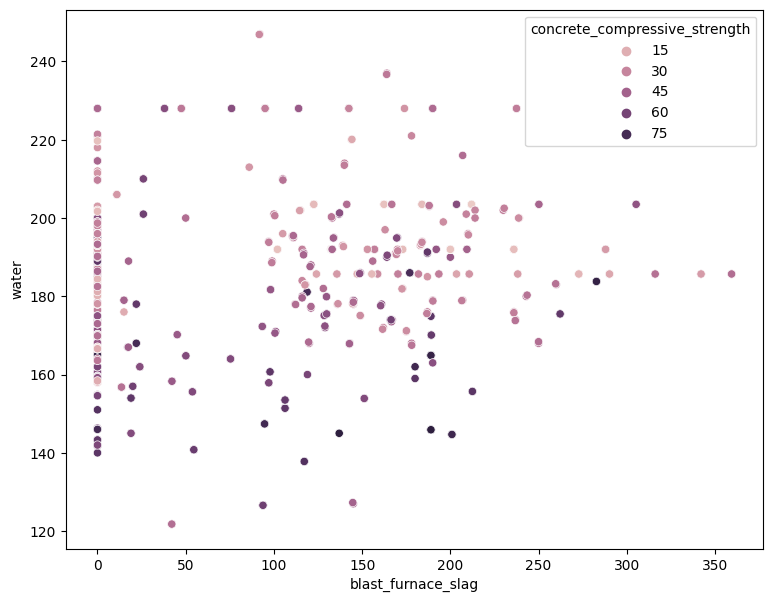

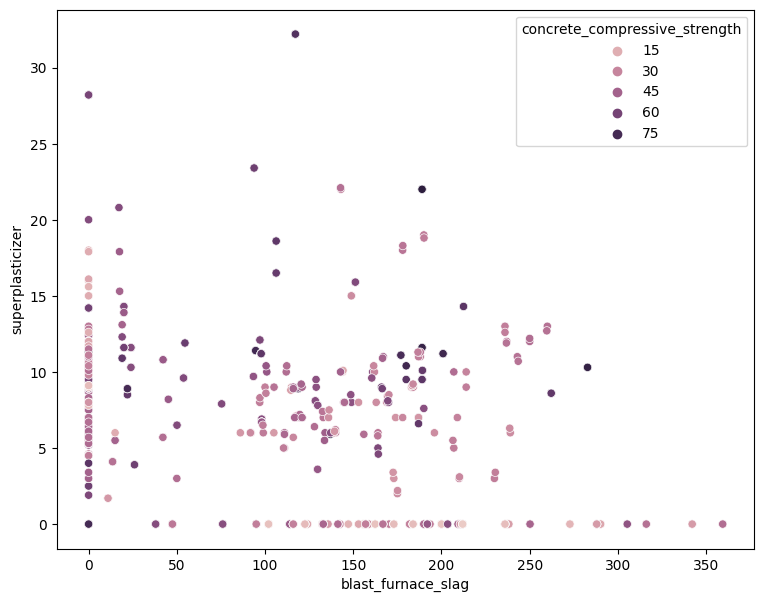

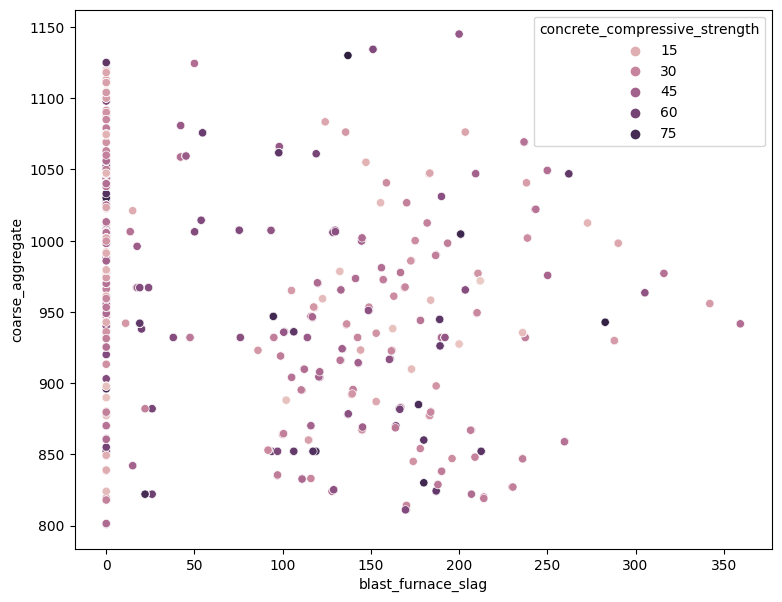

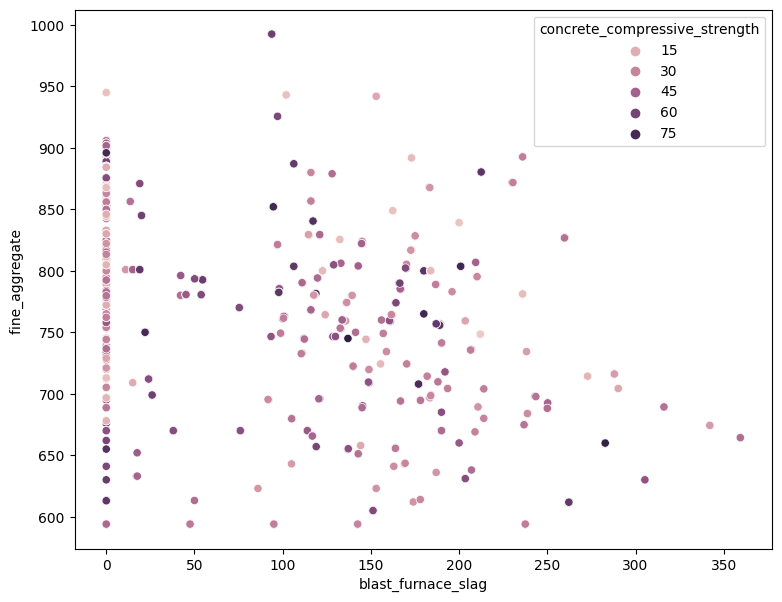

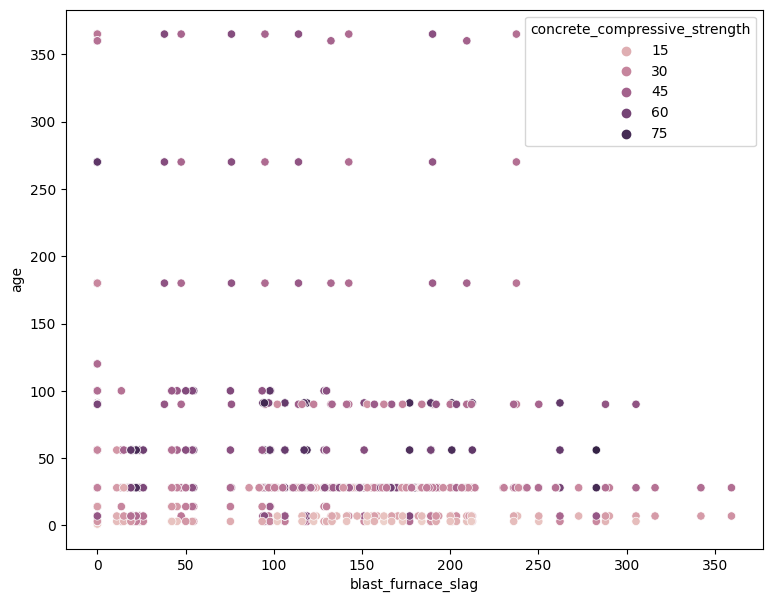

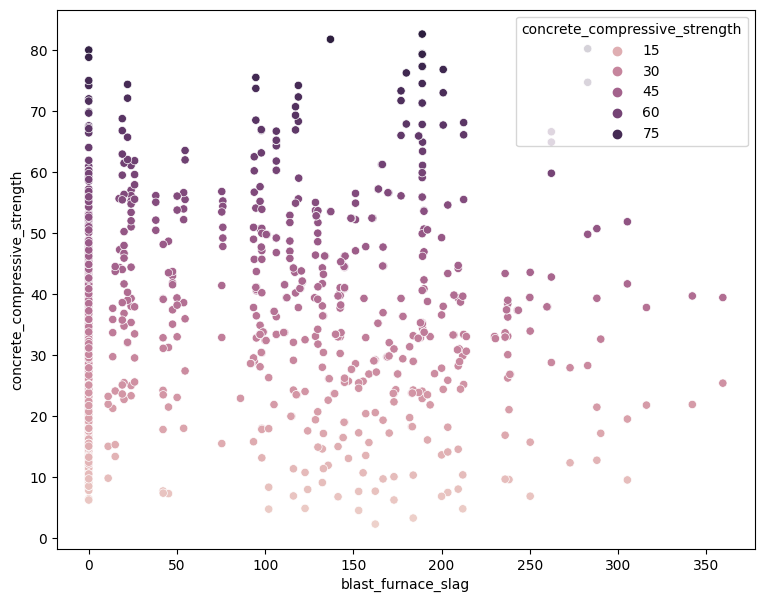

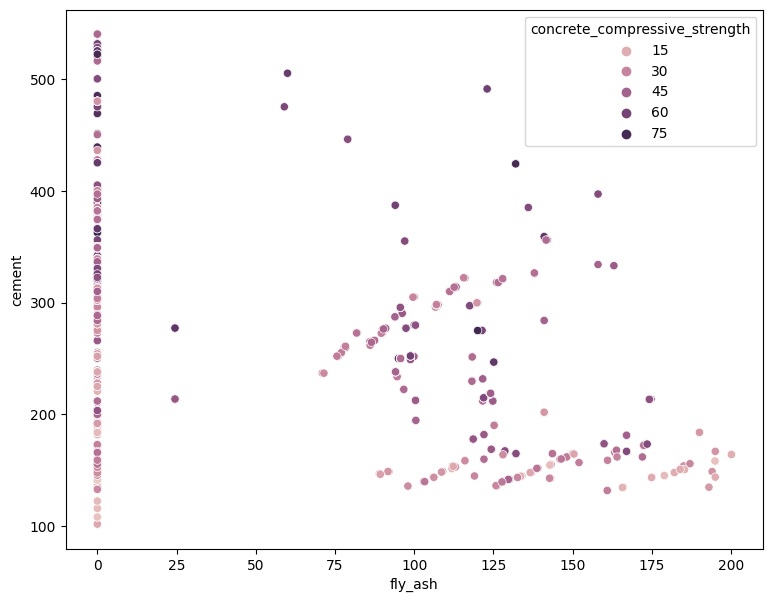

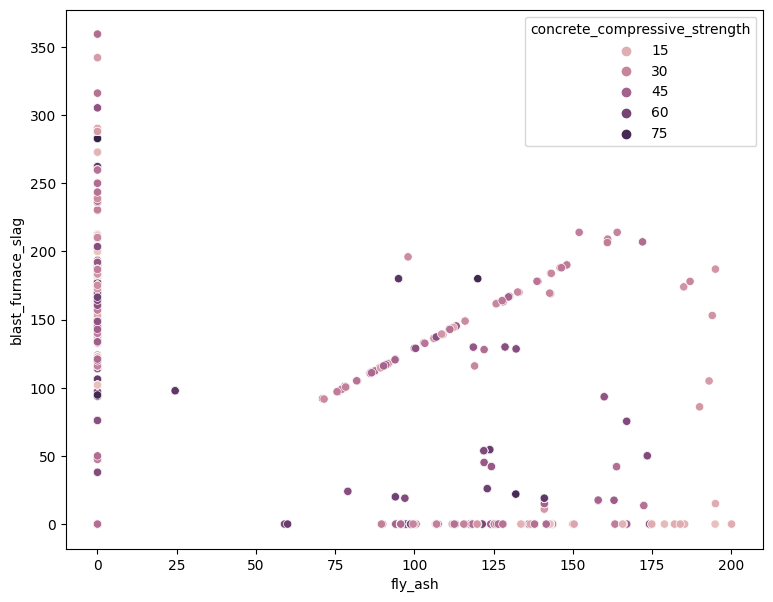

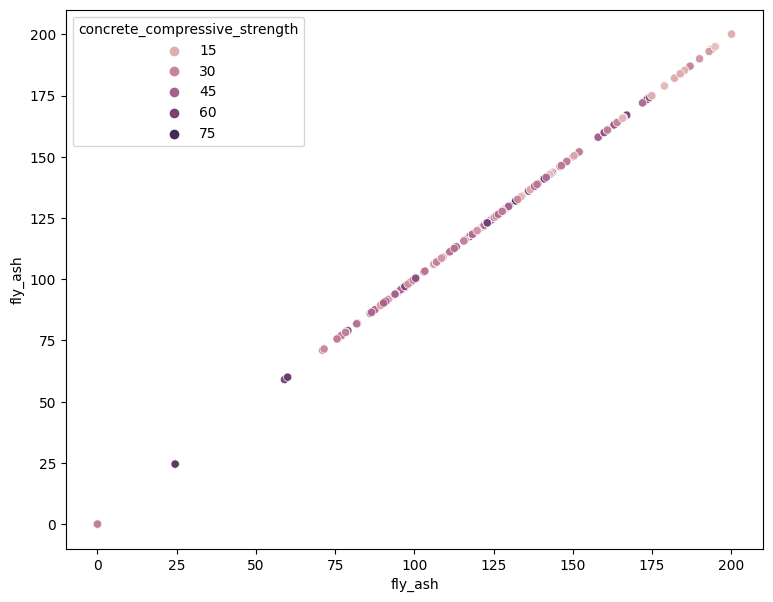

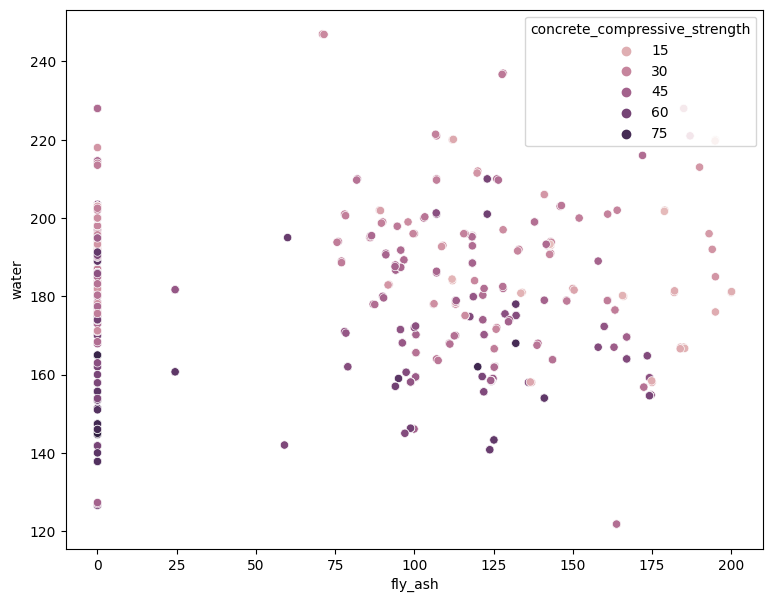

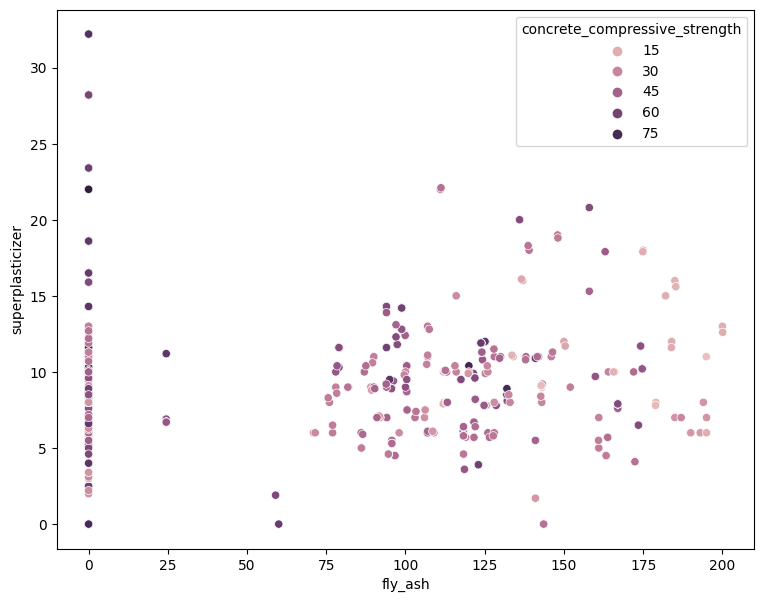

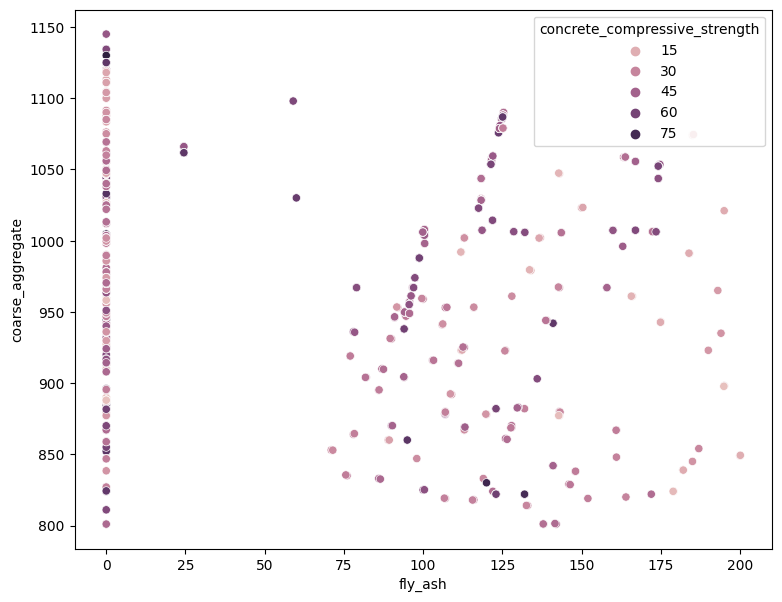

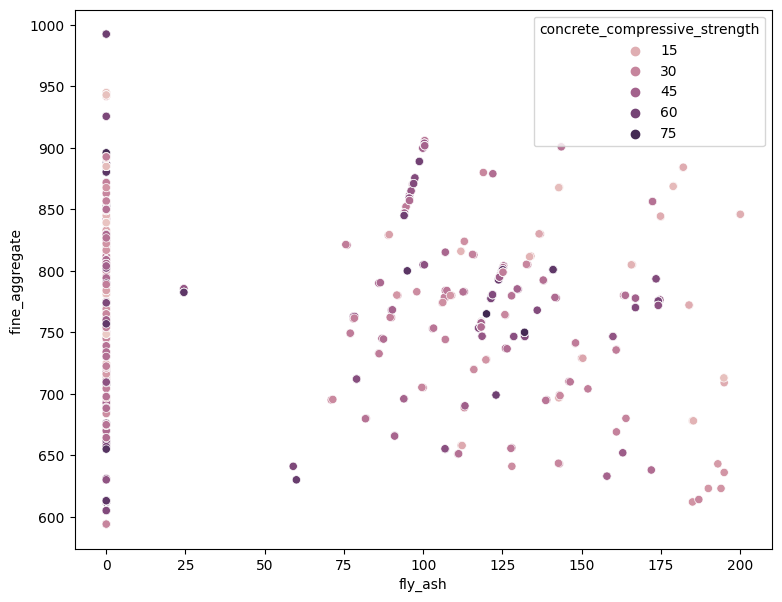

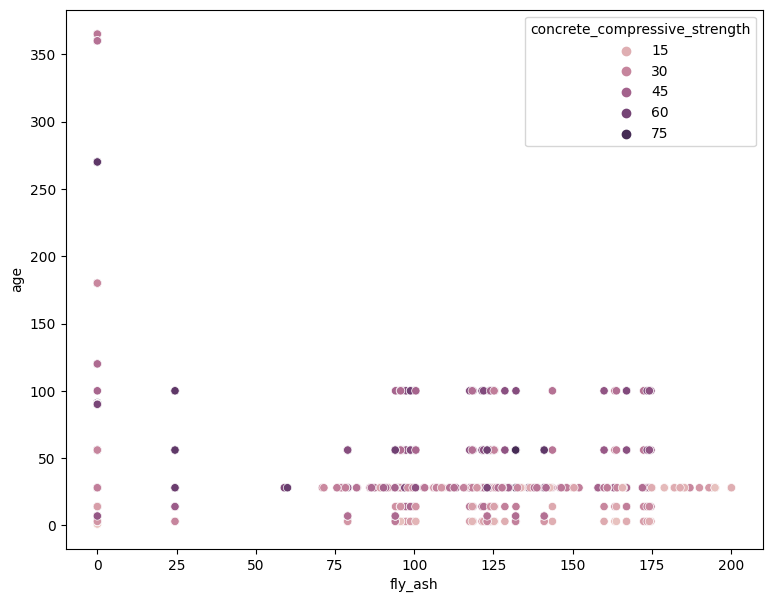

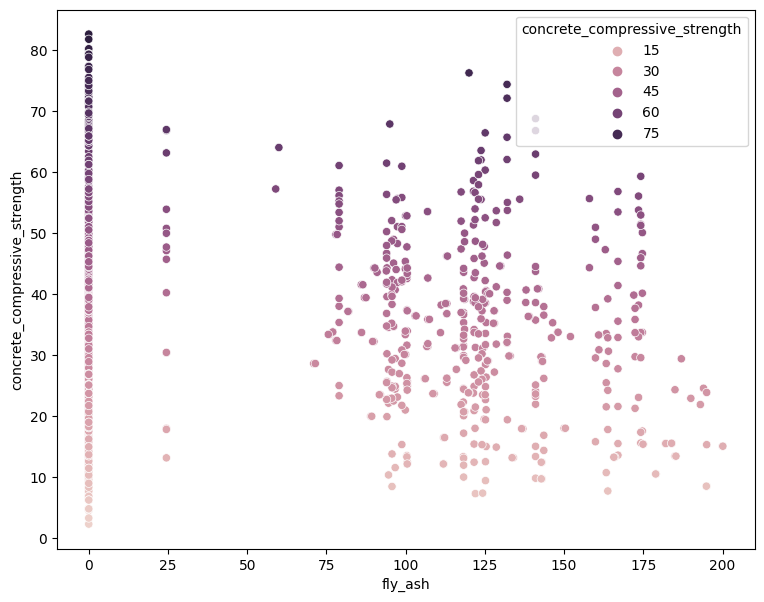

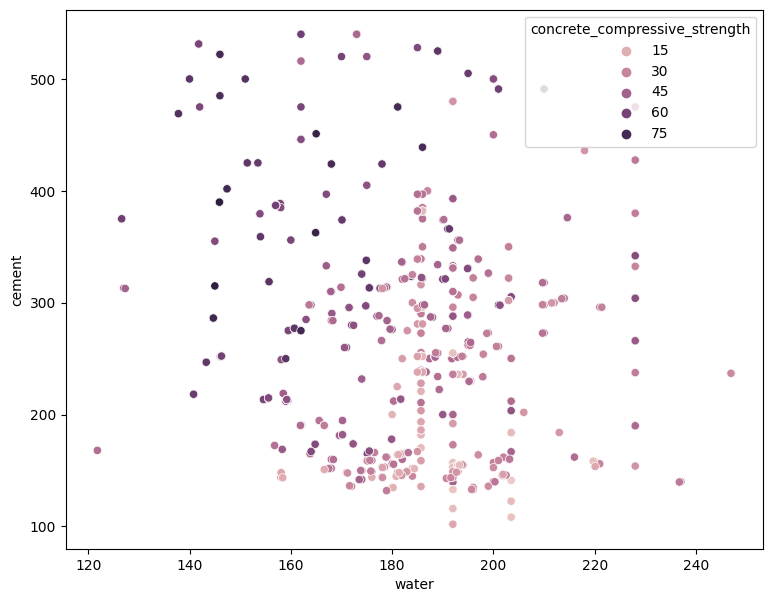

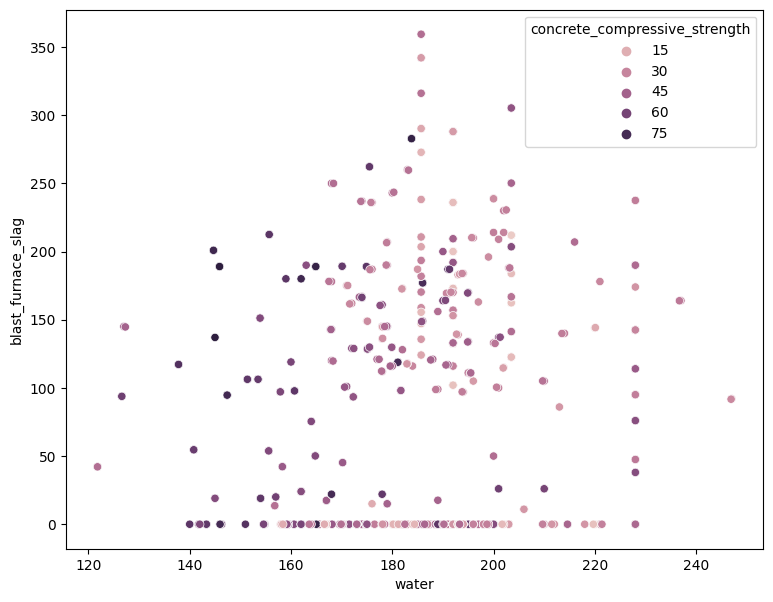

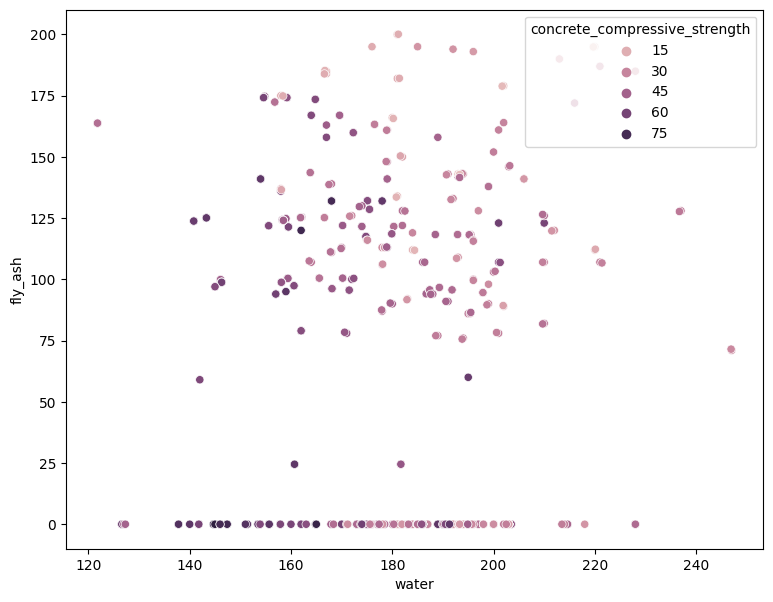

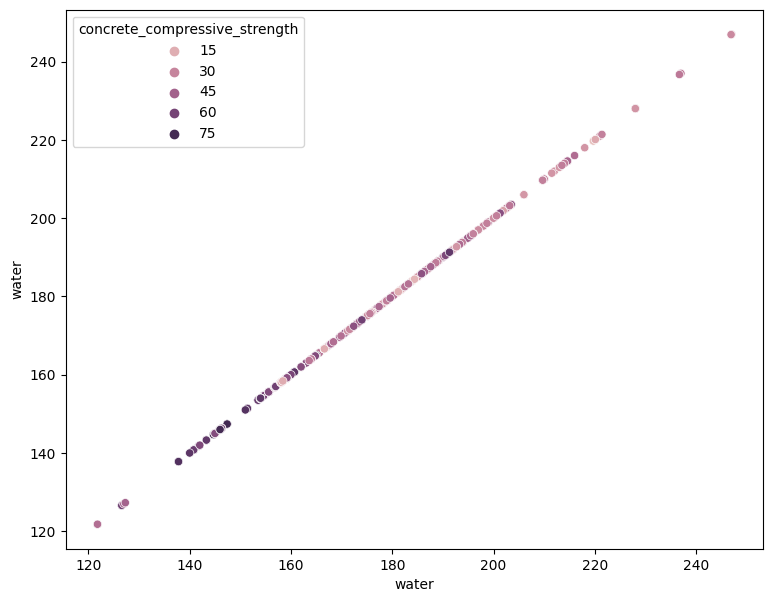

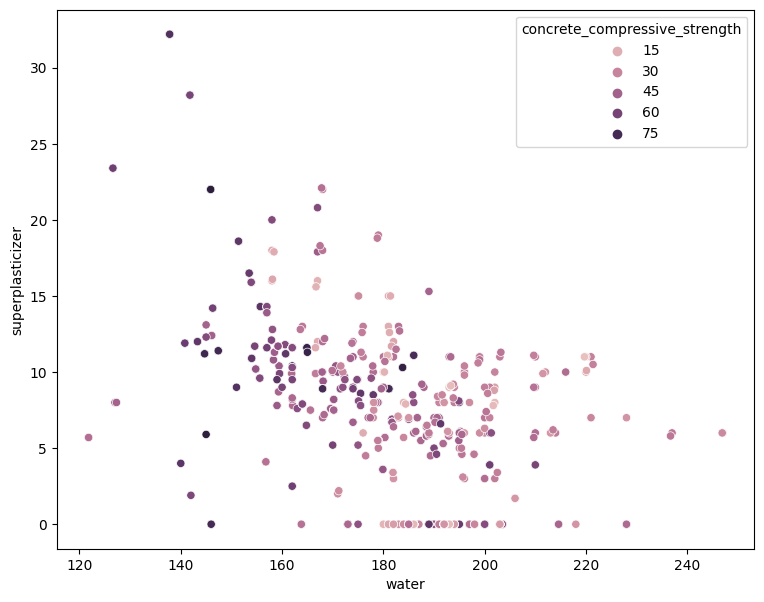

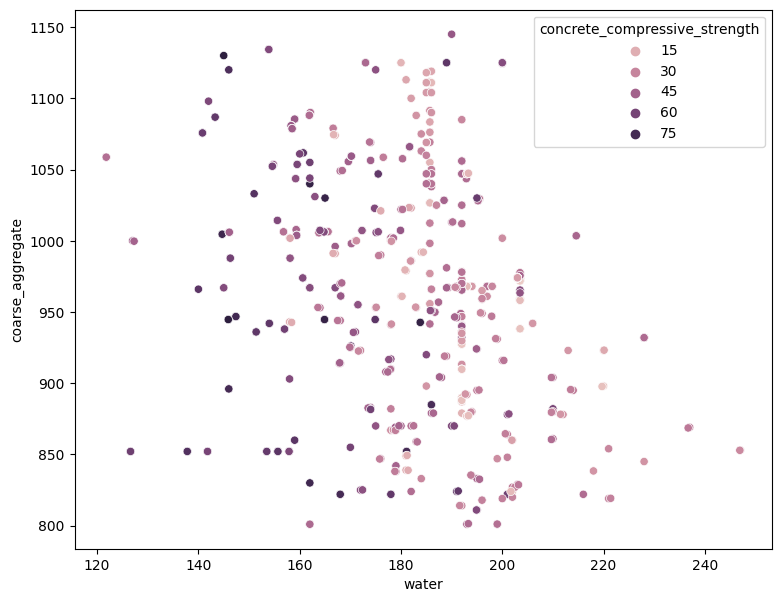

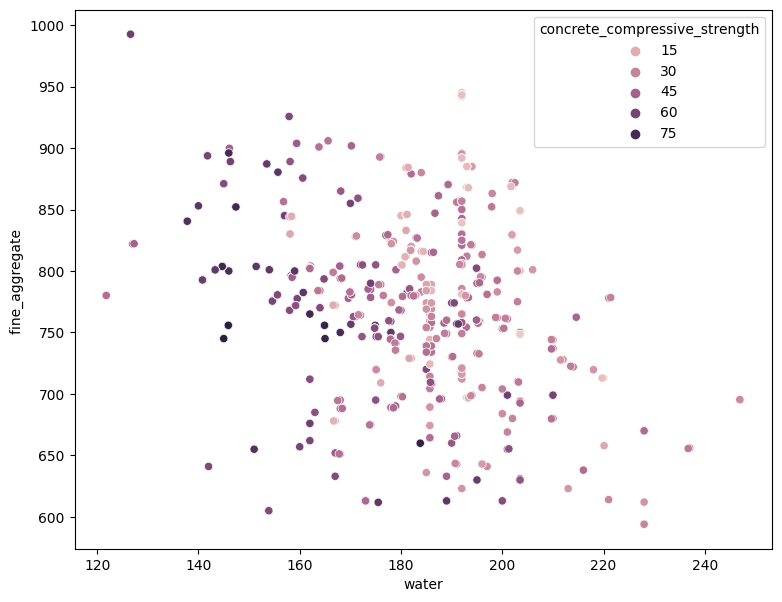

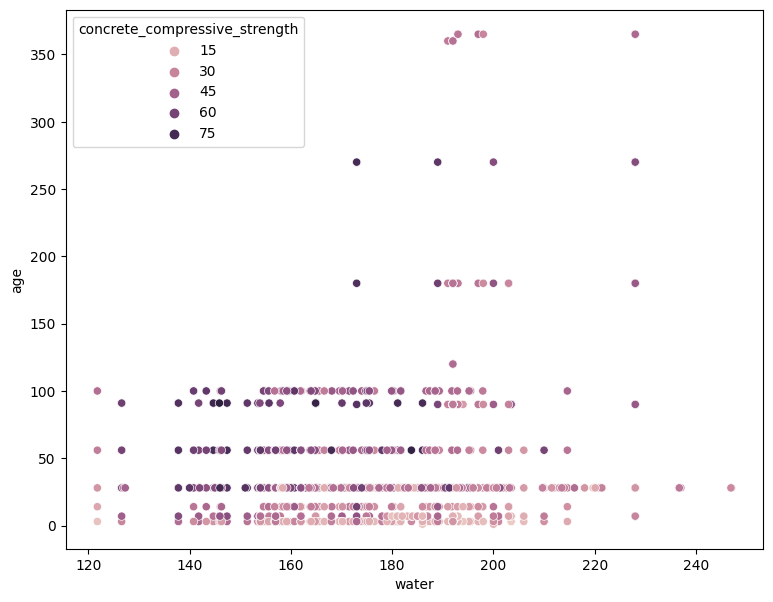

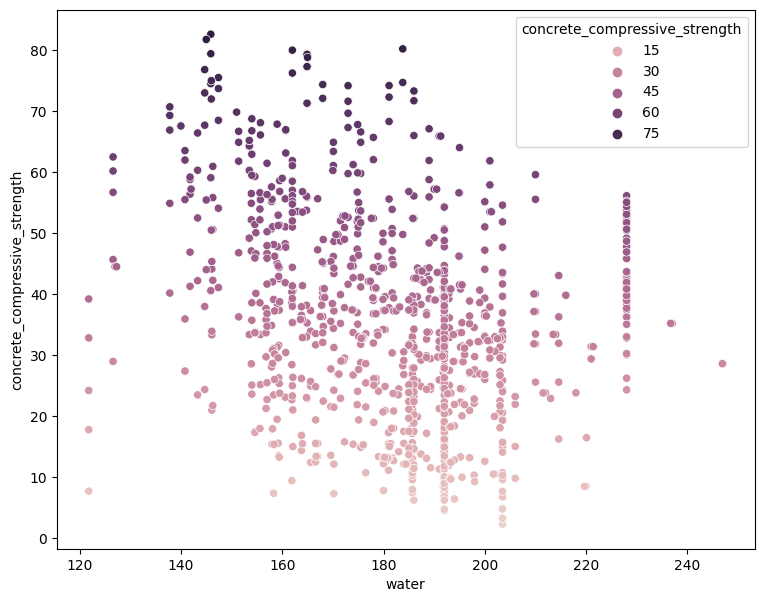

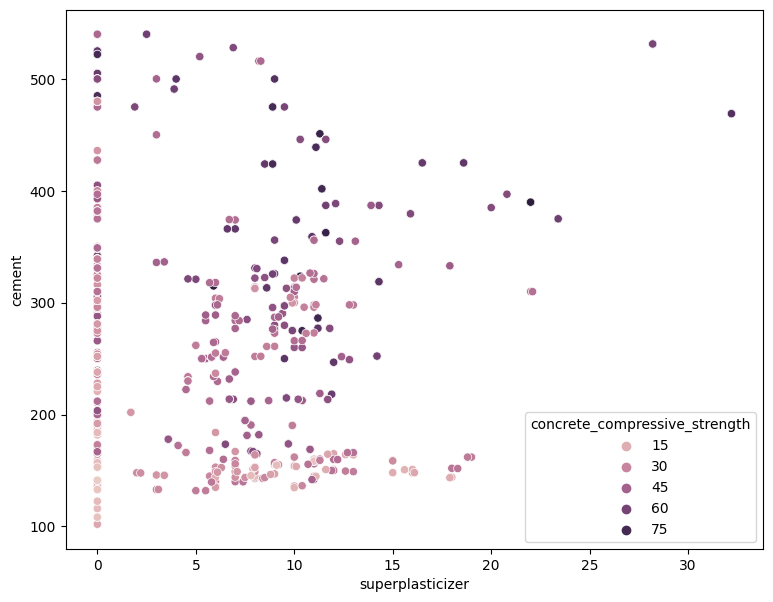

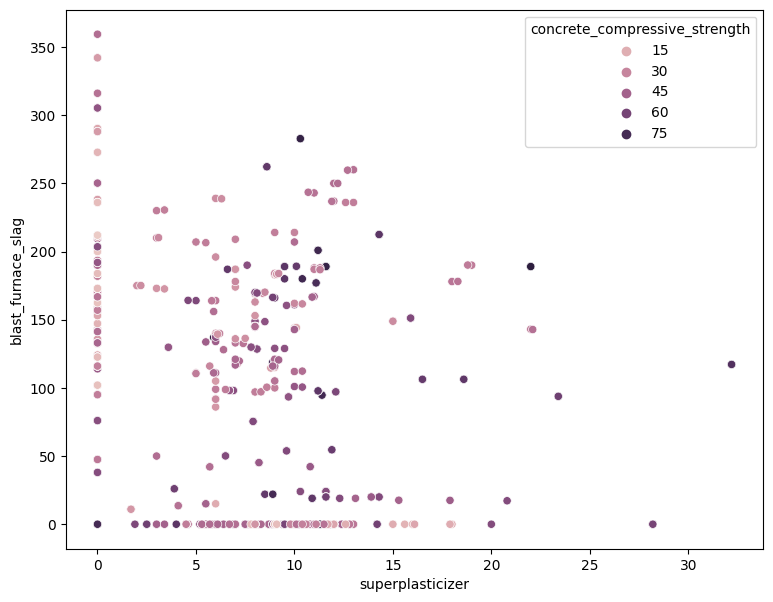

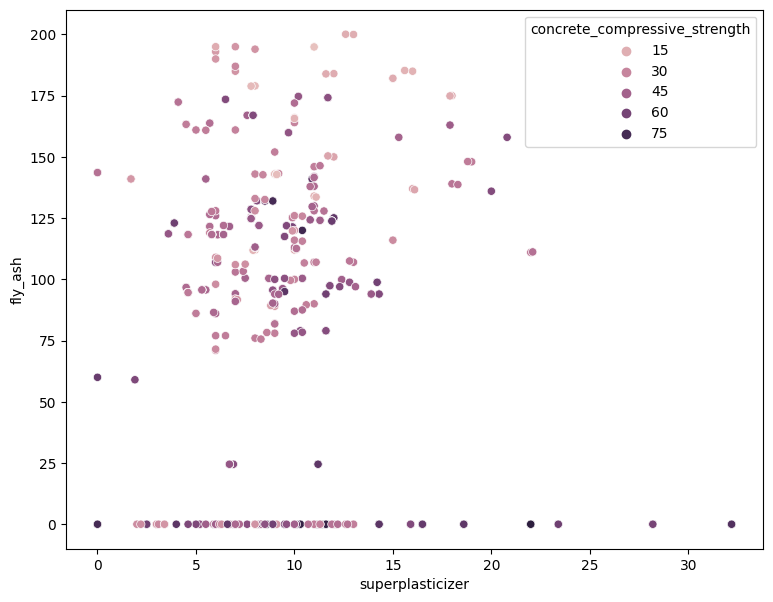

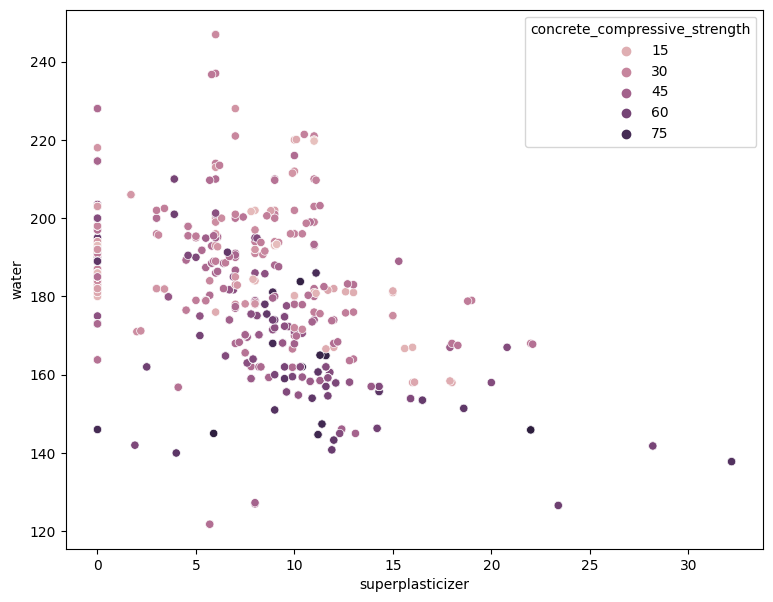

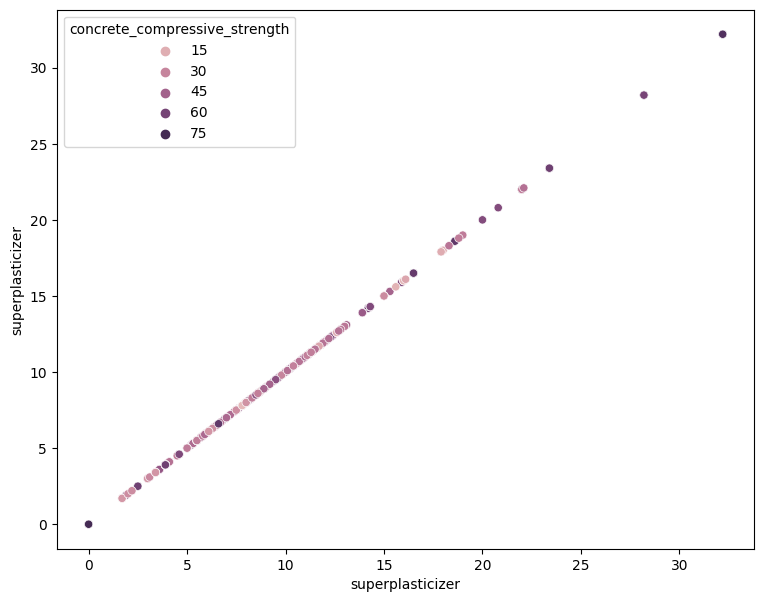

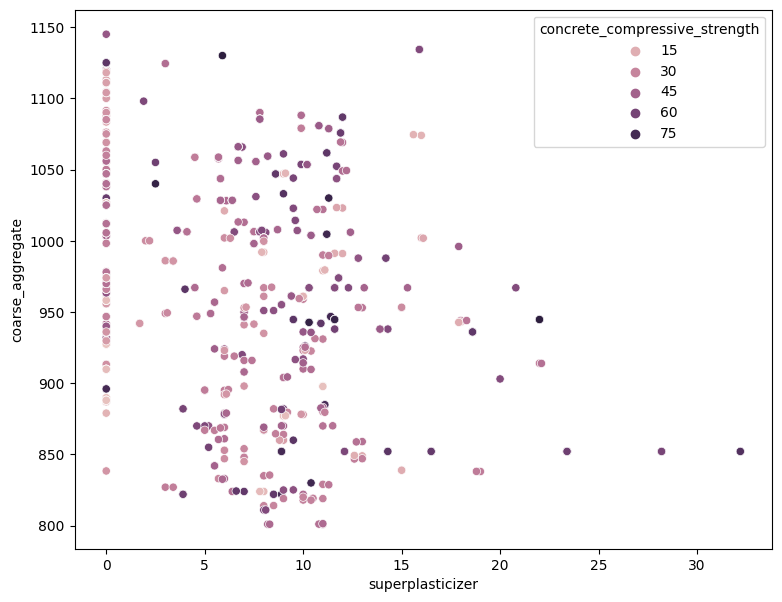

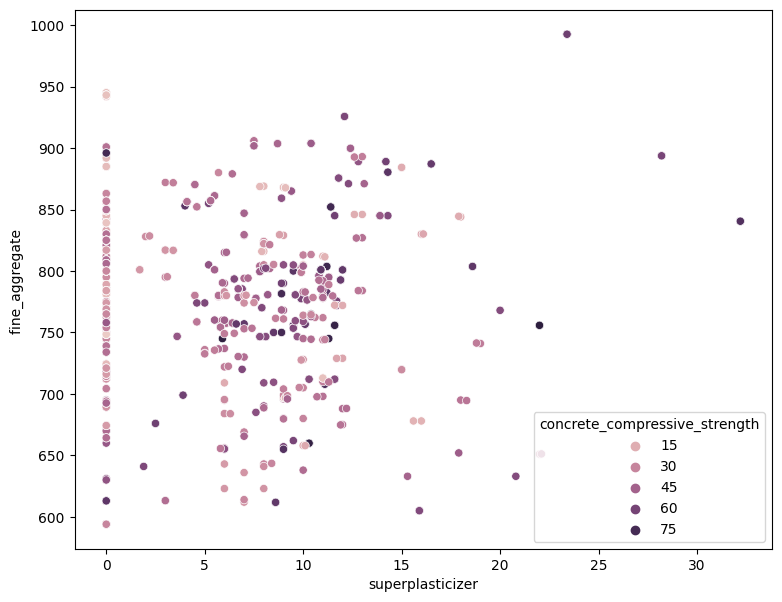

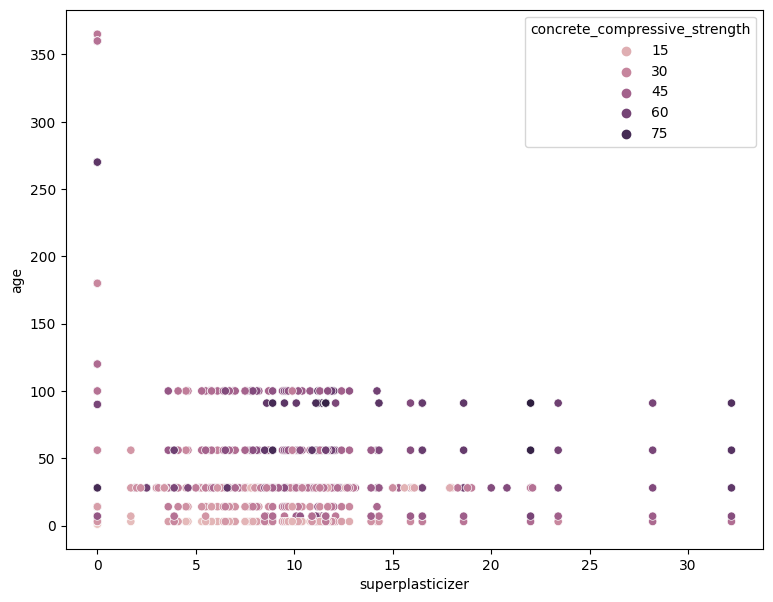

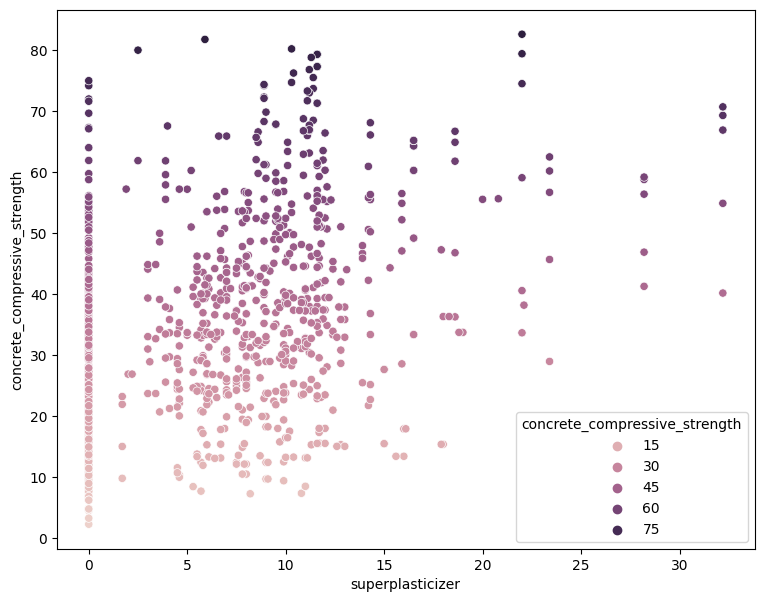

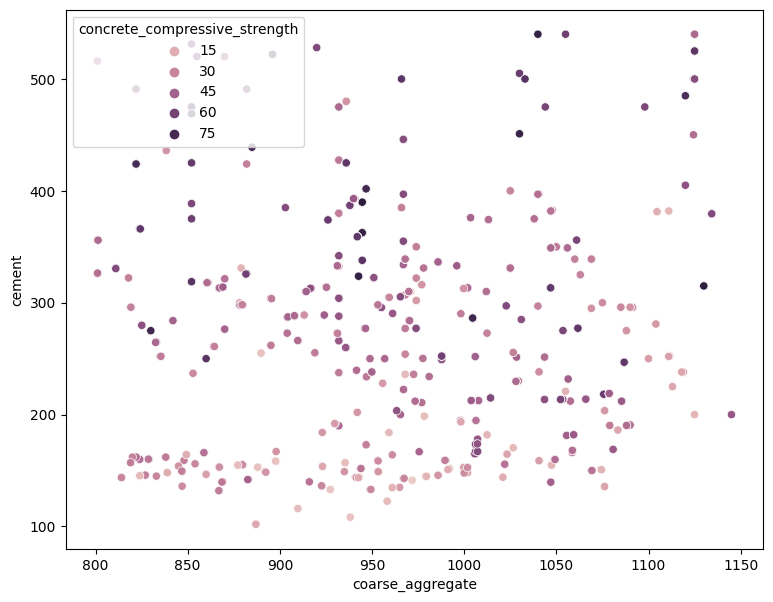

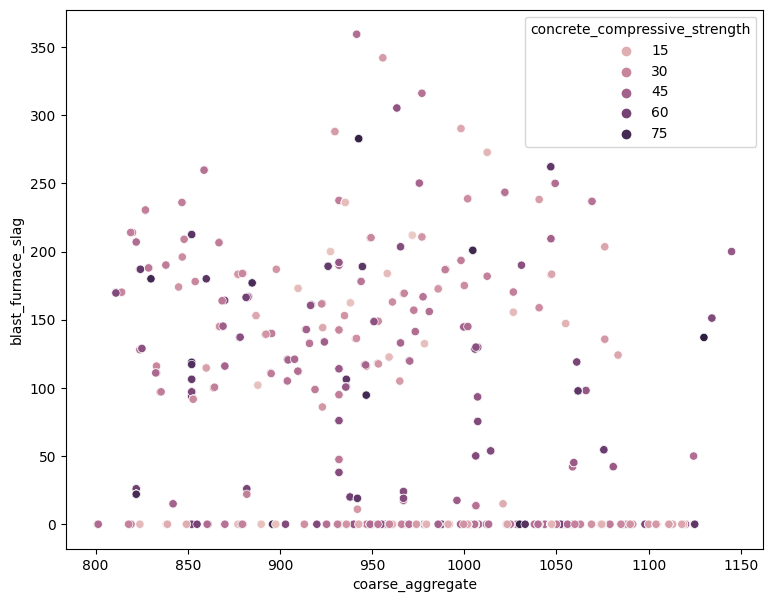

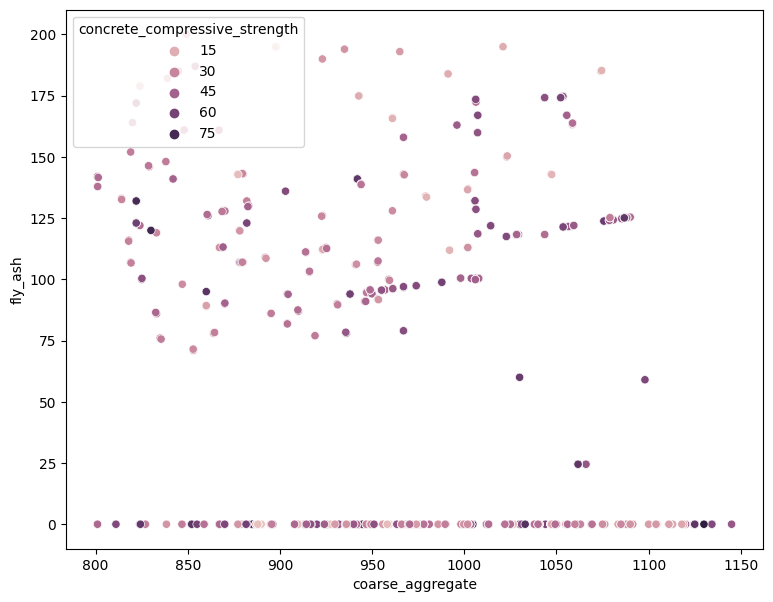

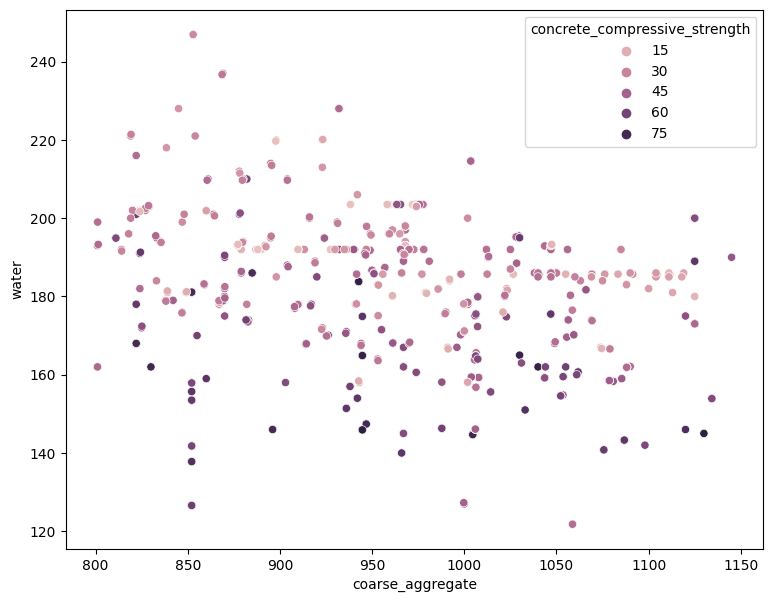

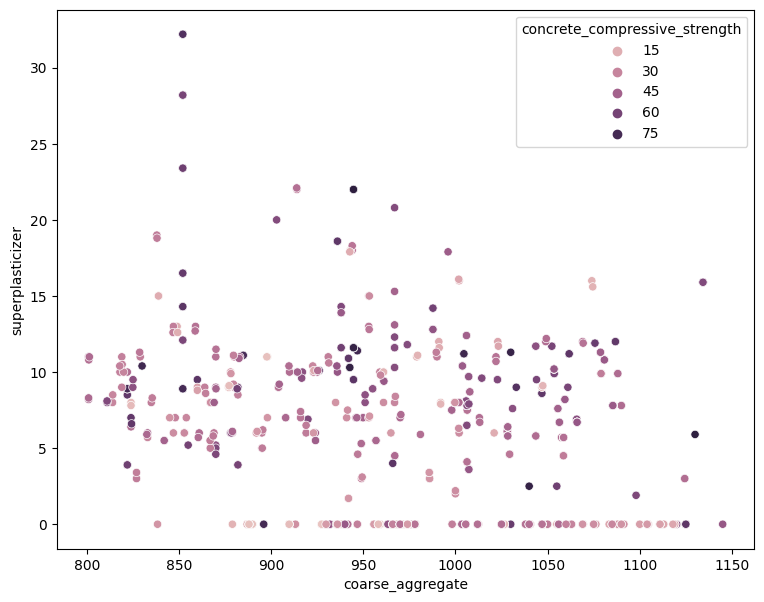

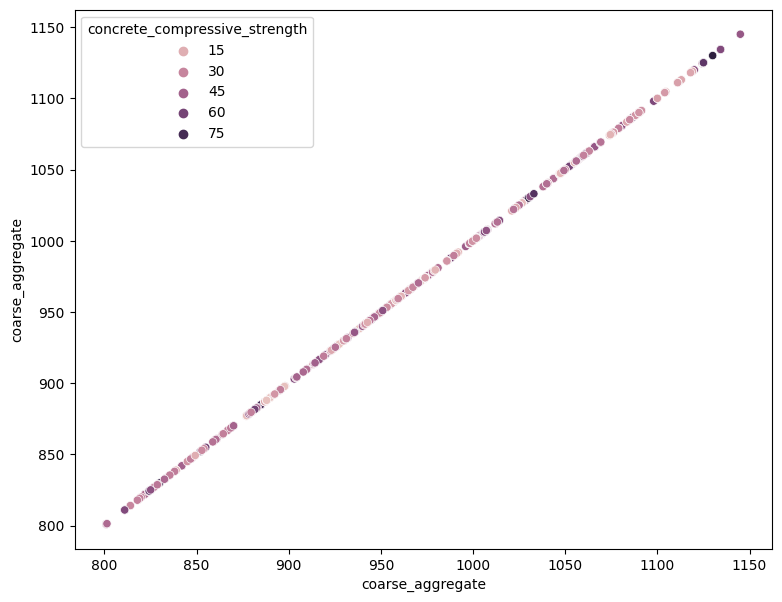

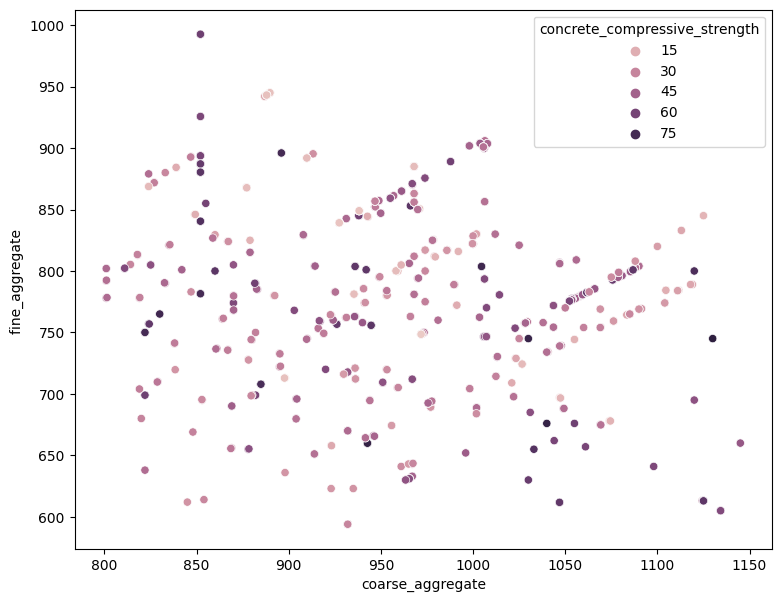

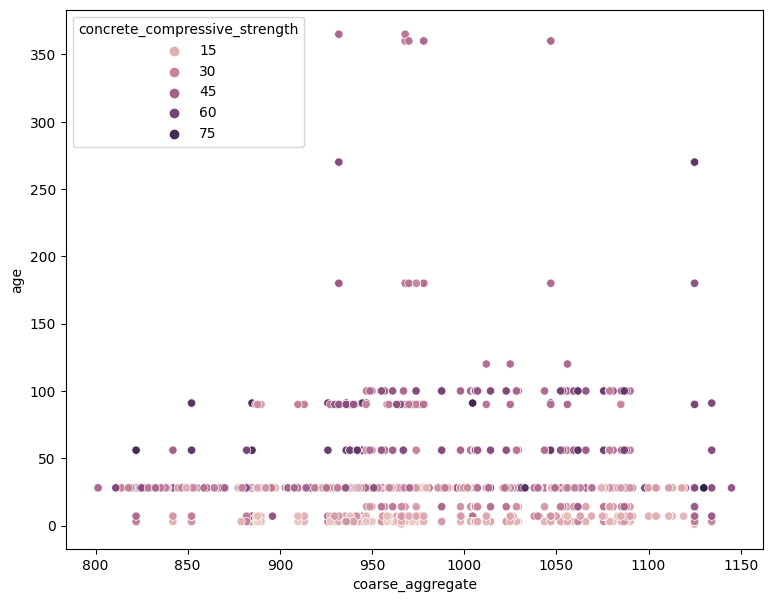

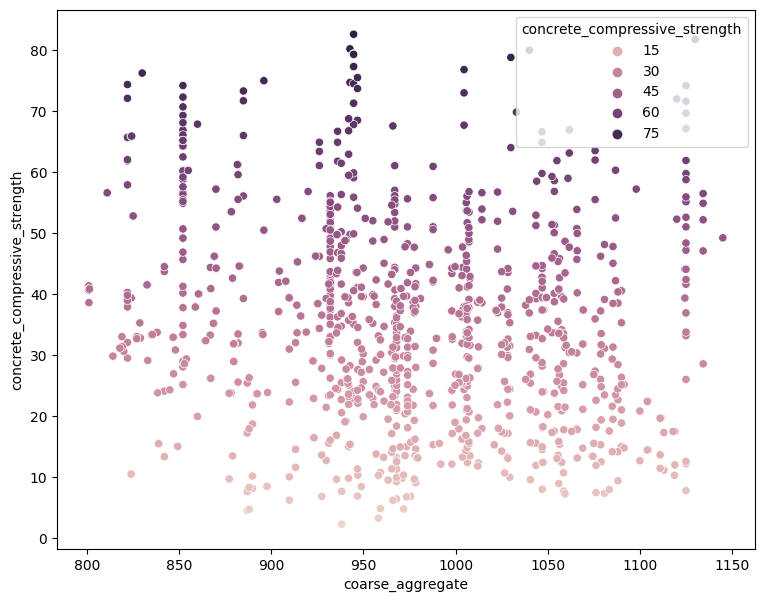

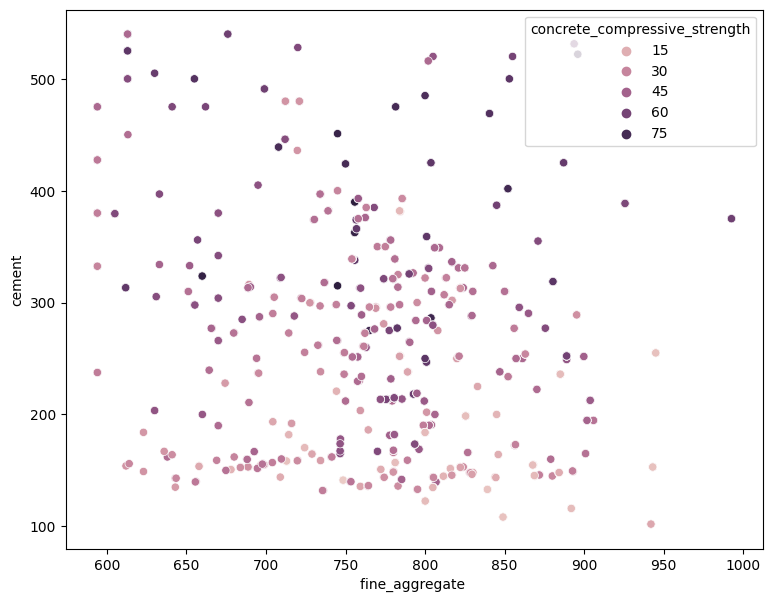

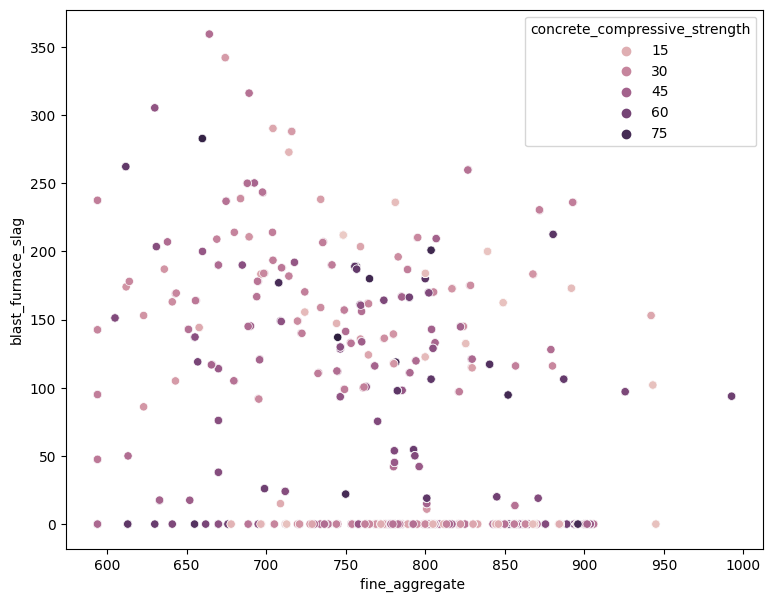

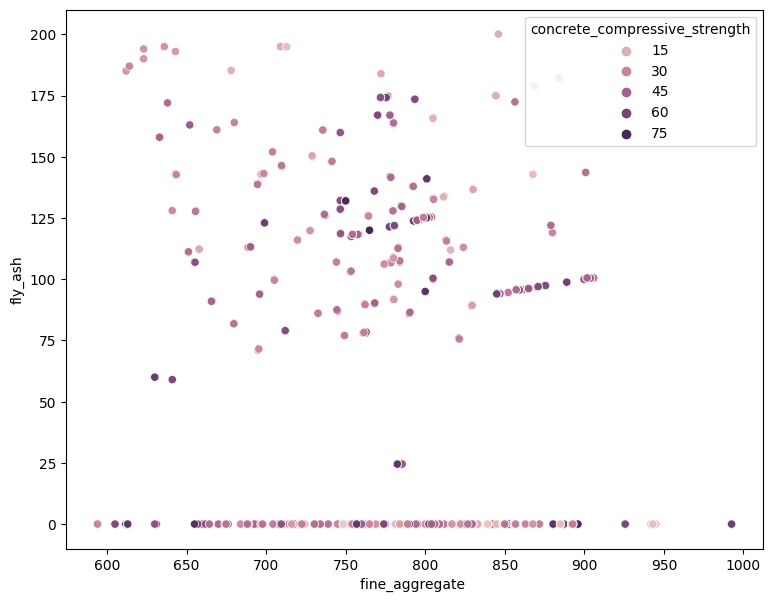

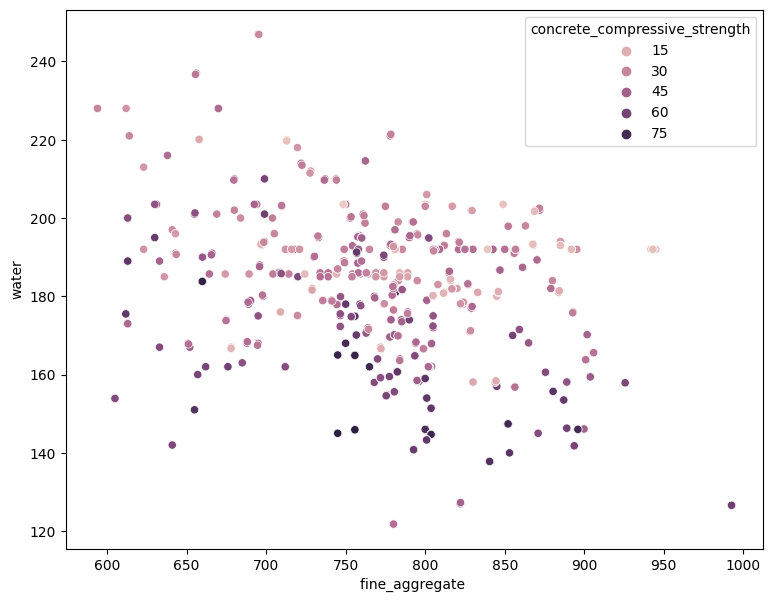

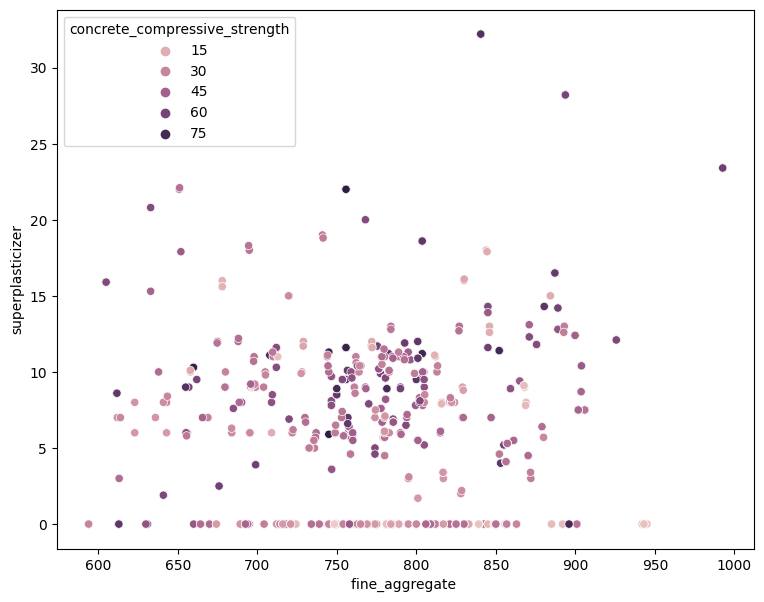

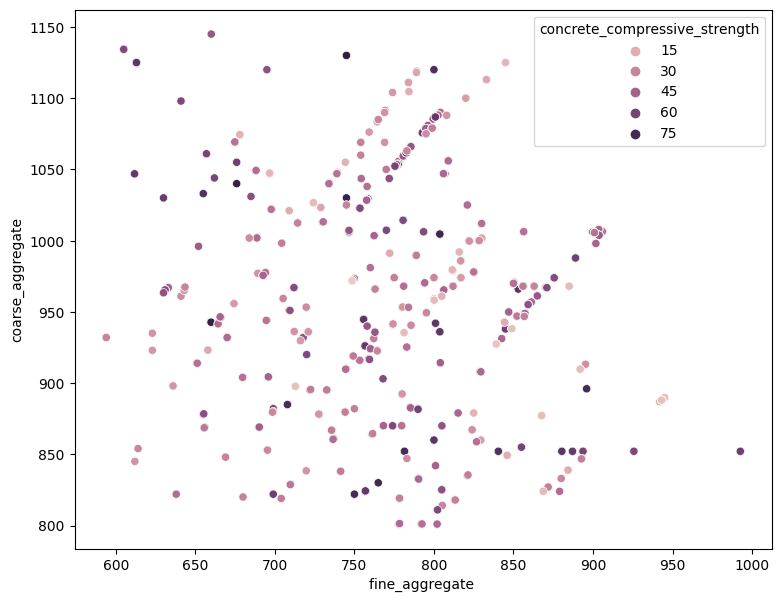

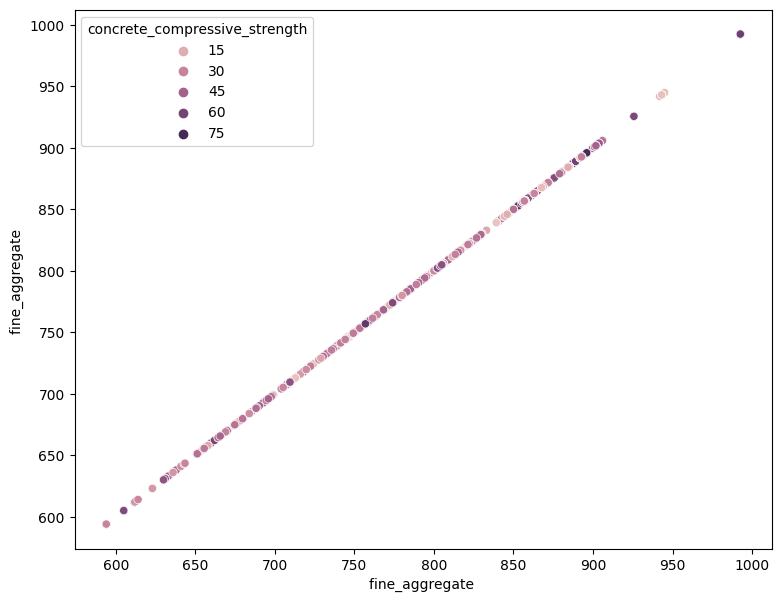

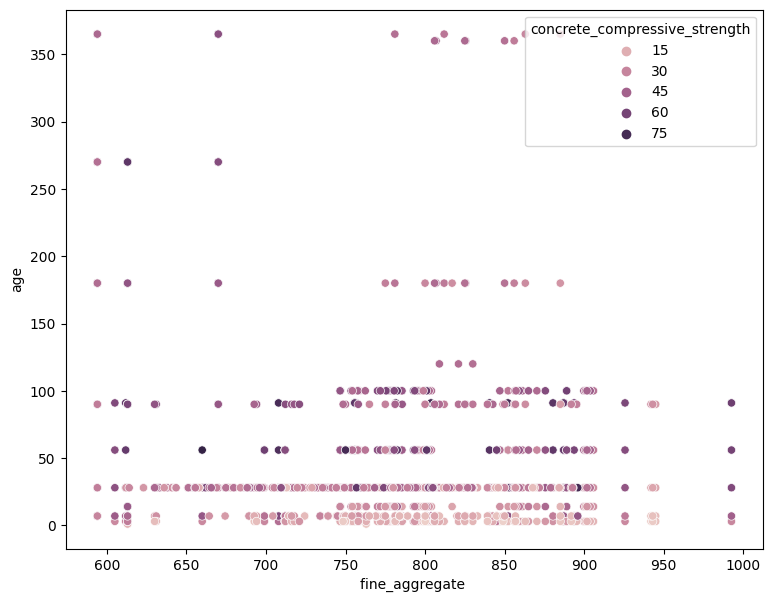

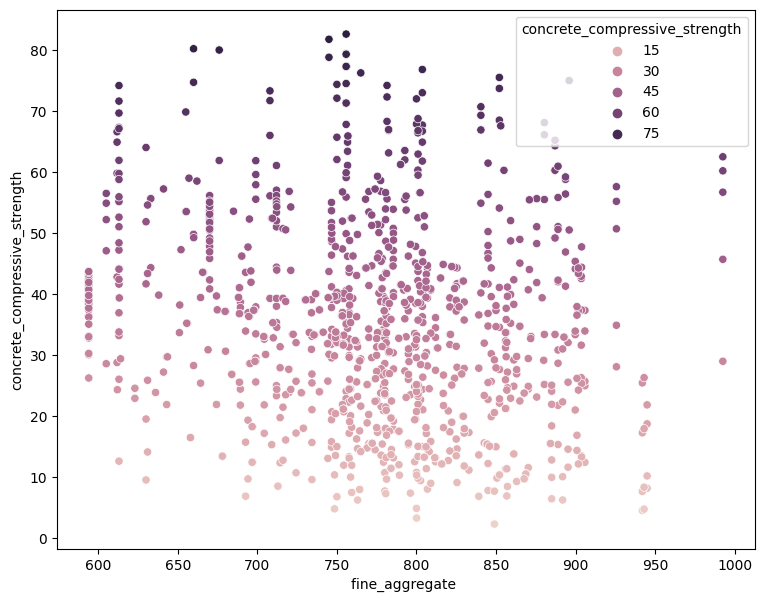

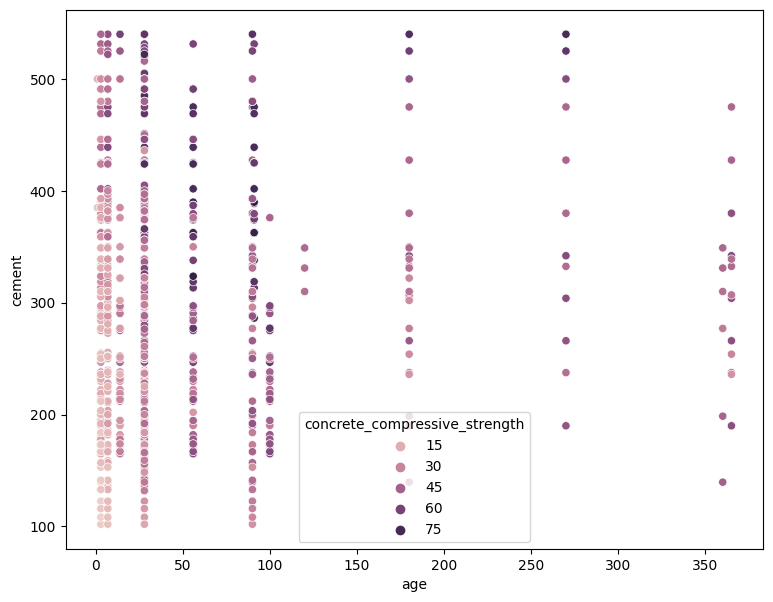

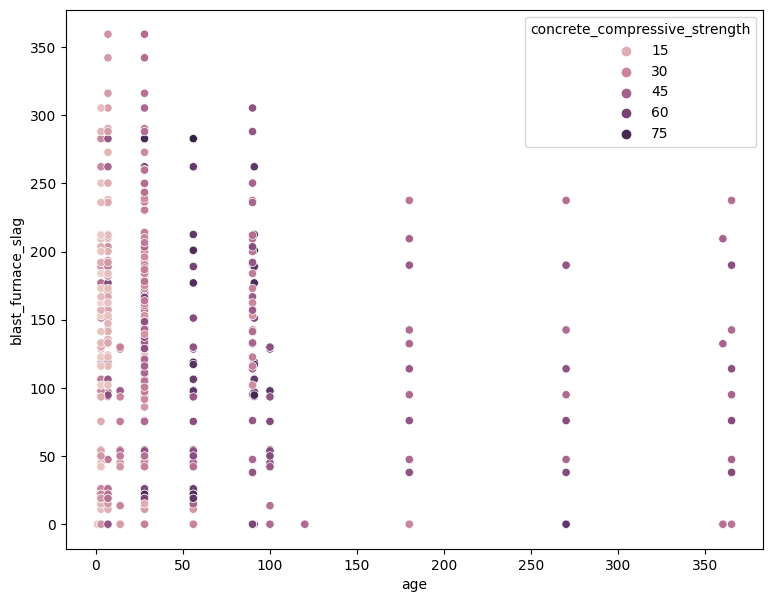

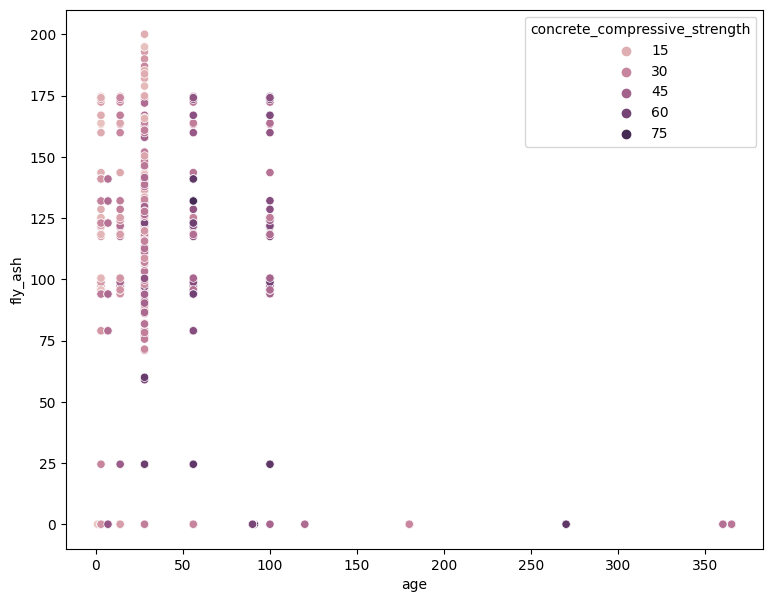

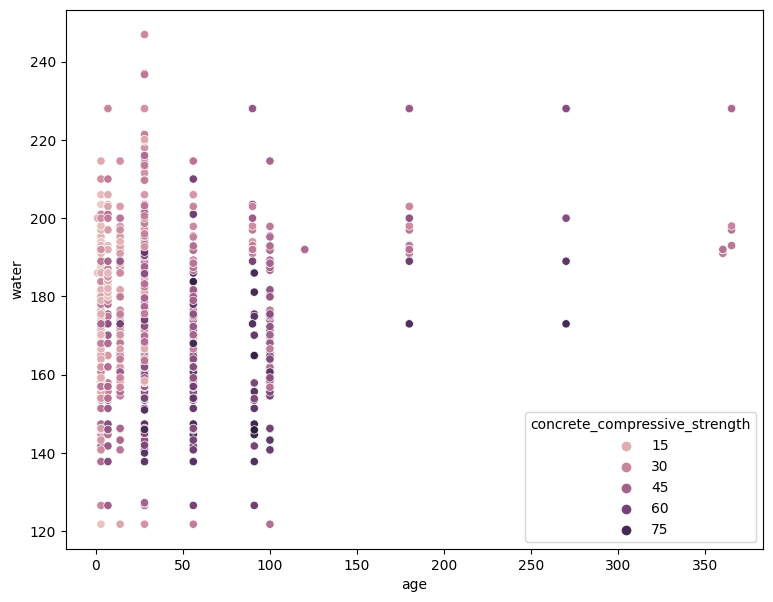

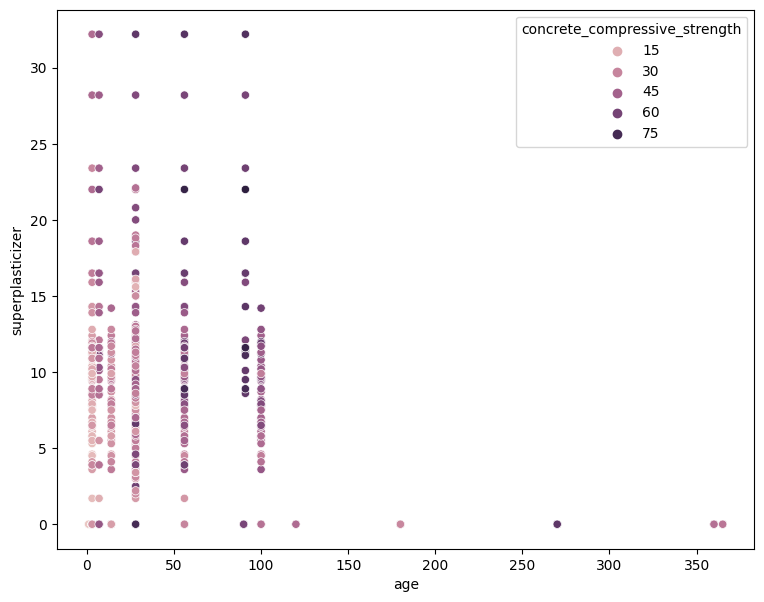

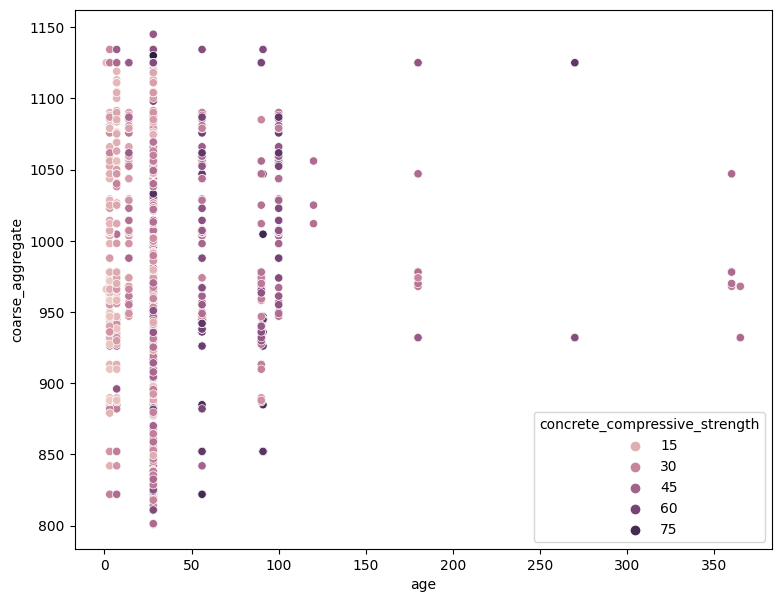

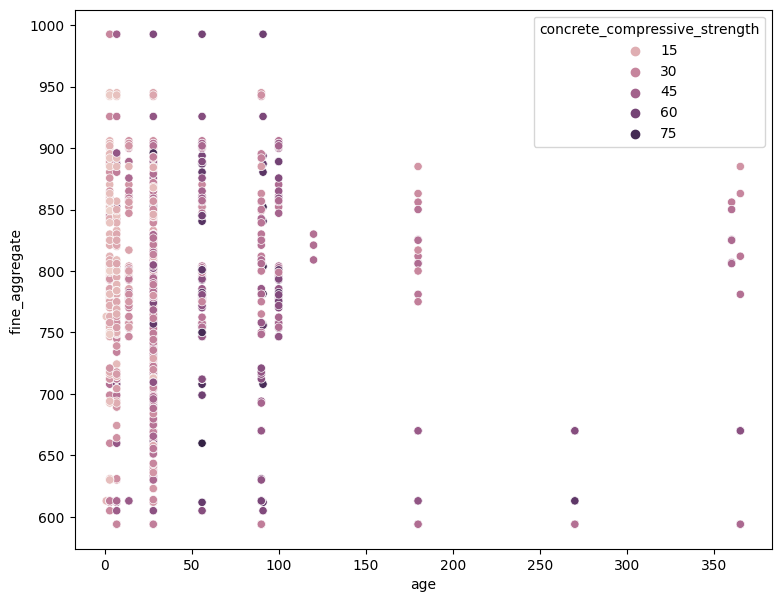

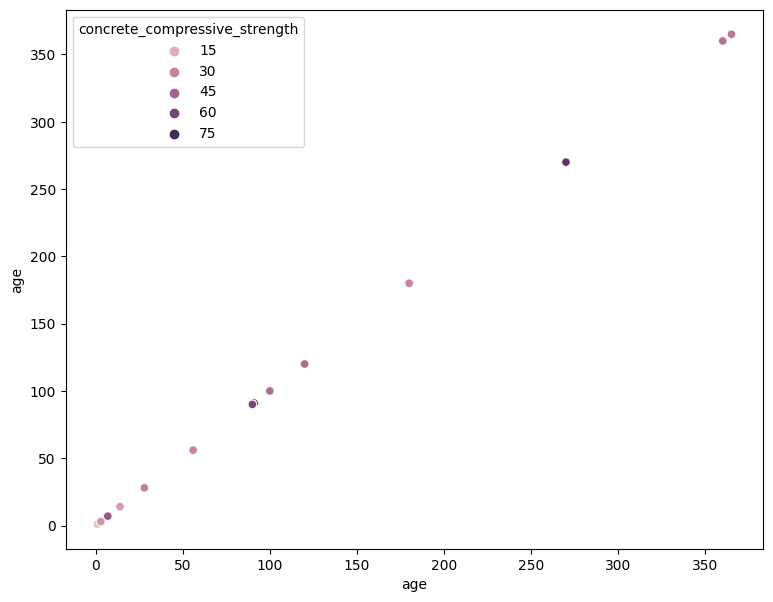

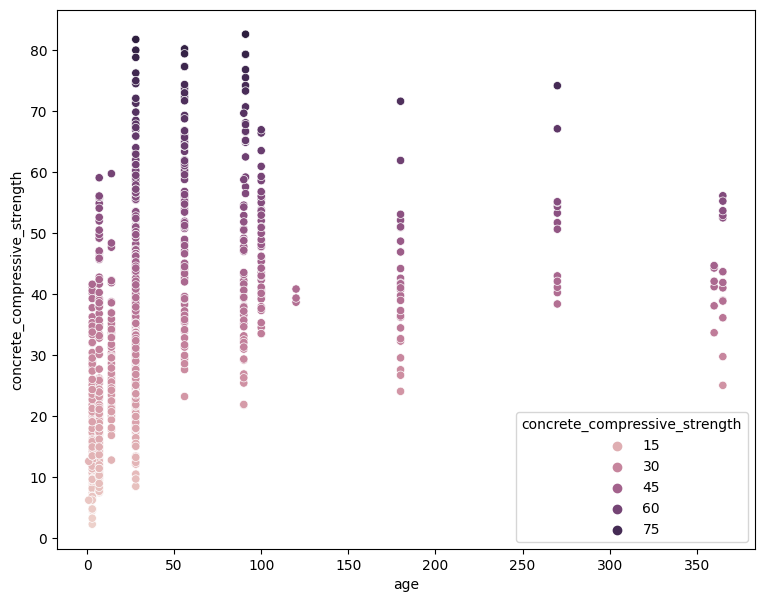

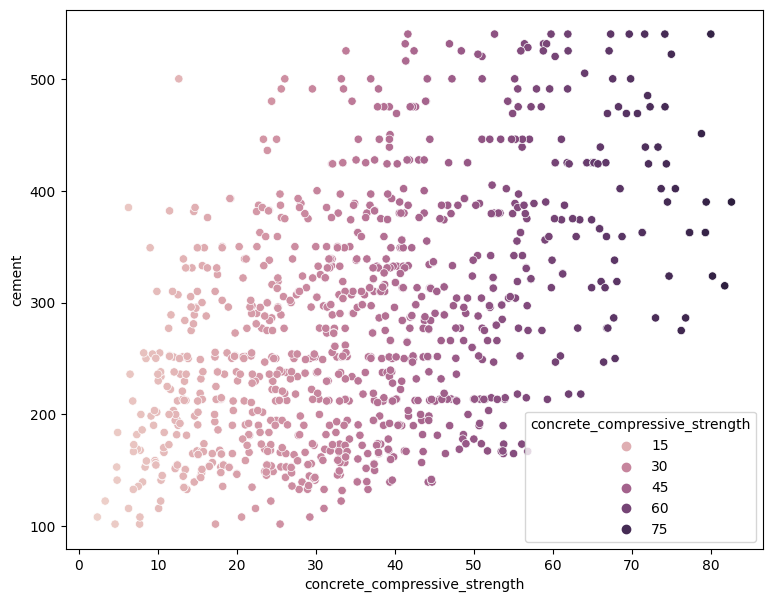

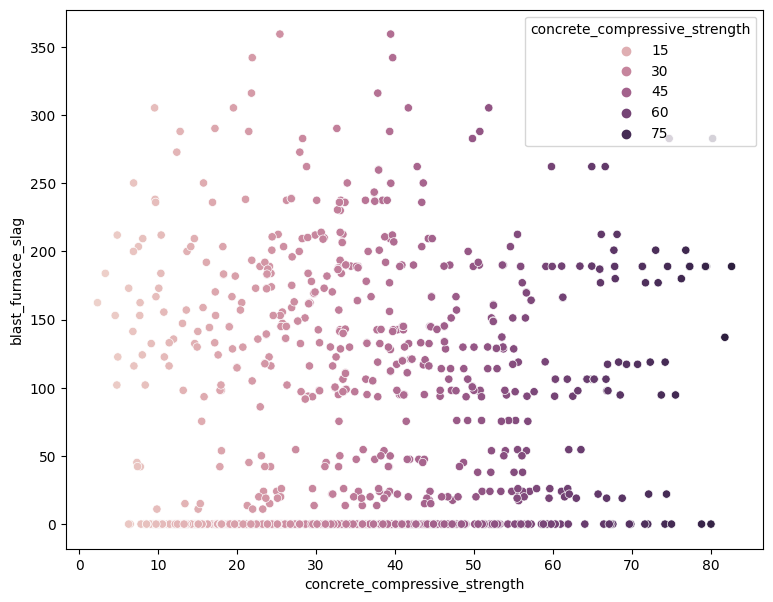

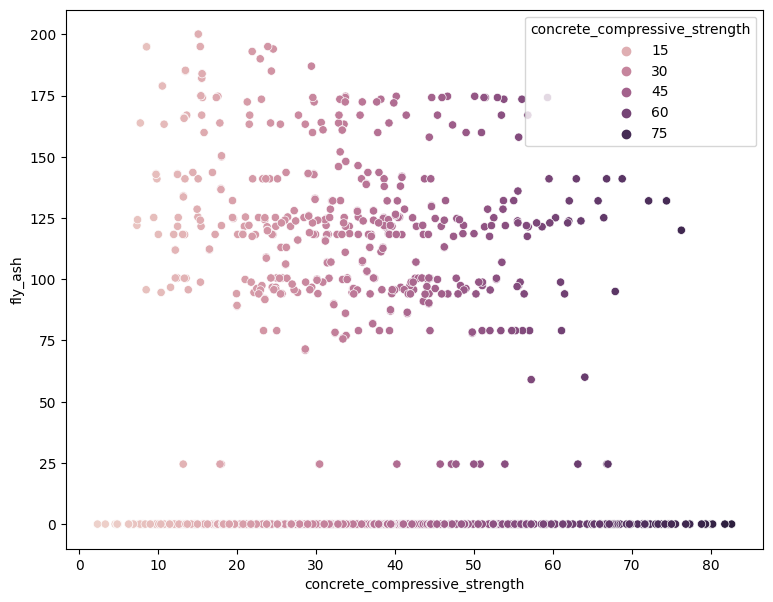

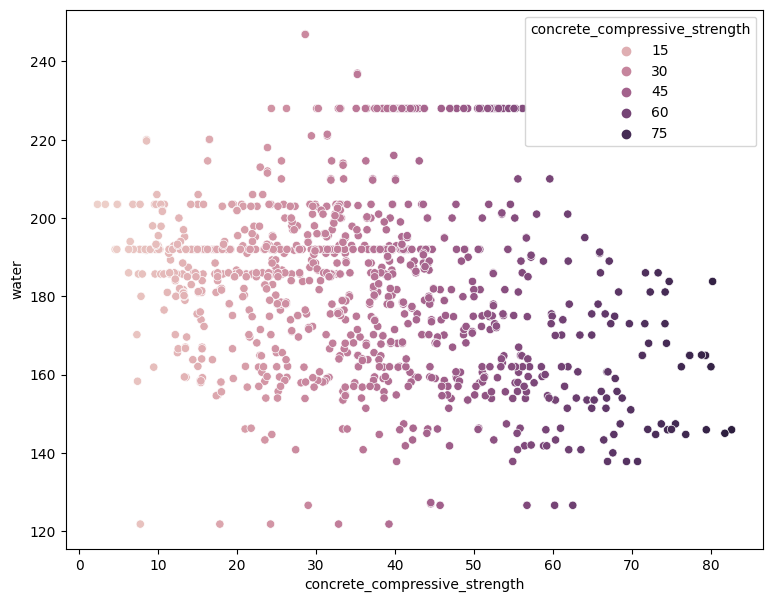

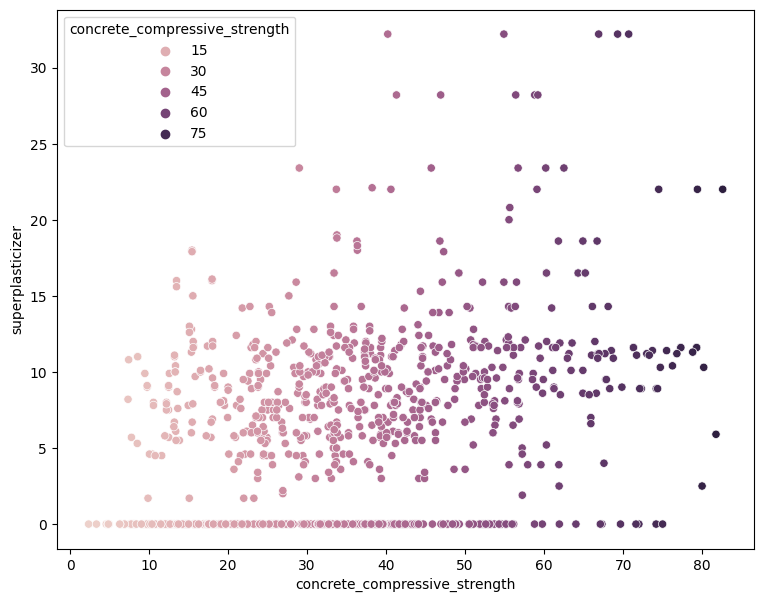

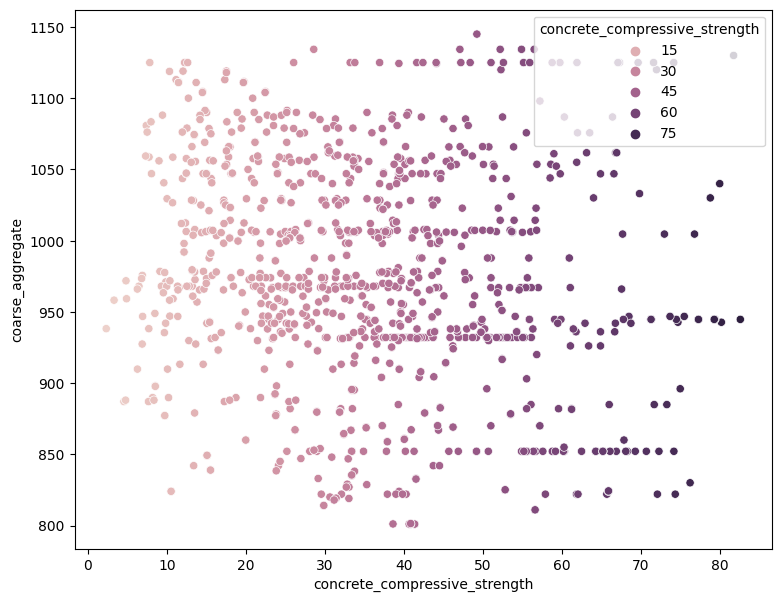

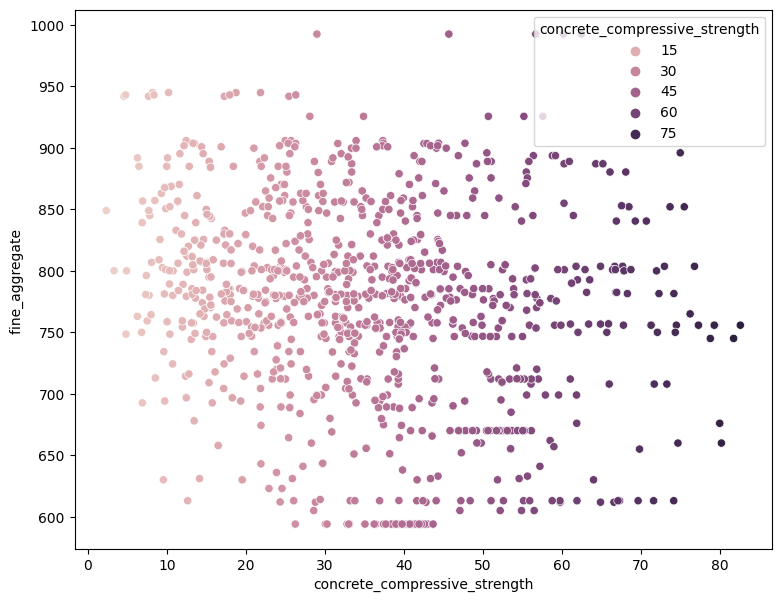

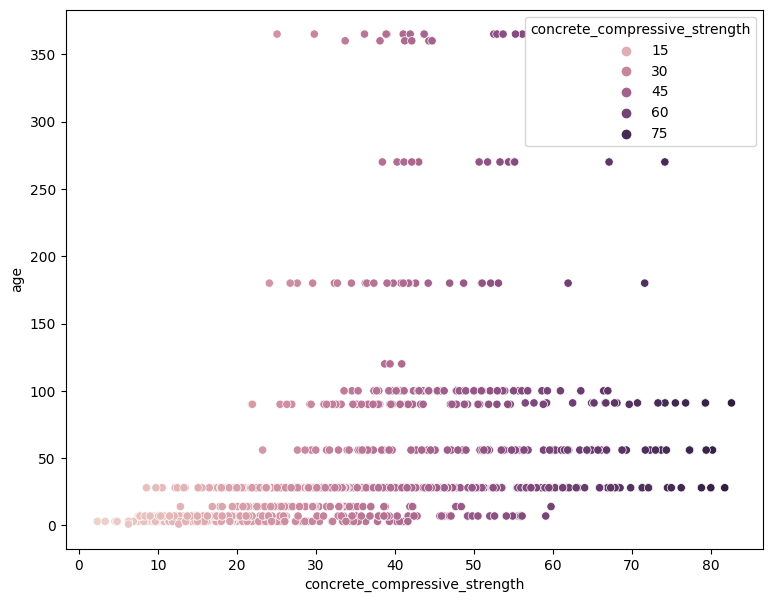

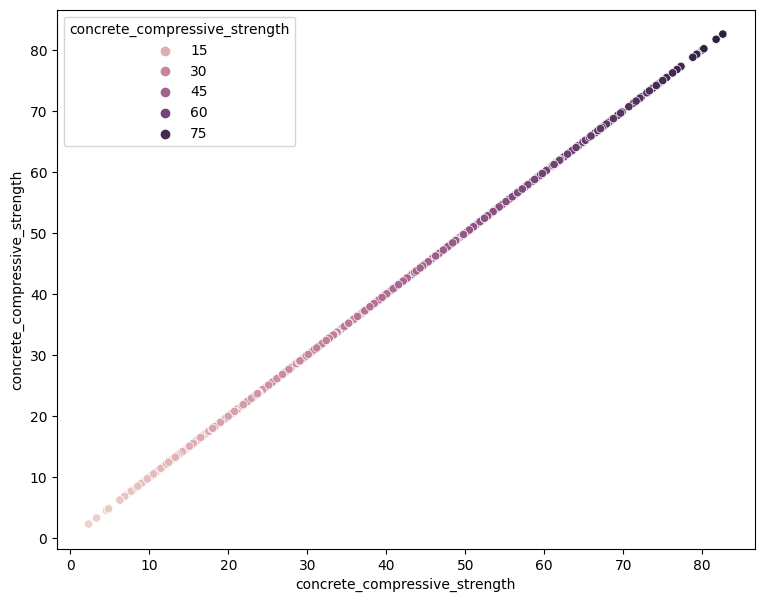

In [13]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=df)
        plt.show()

### Outlier Analysis

In [14]:
def outlier(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

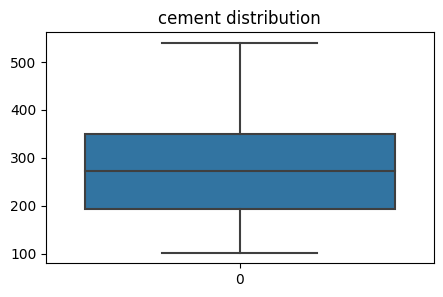

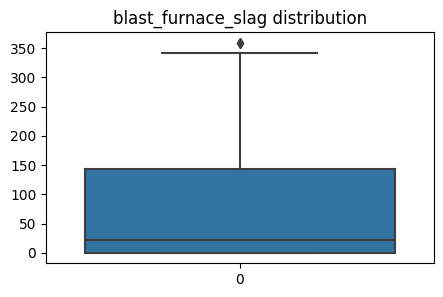

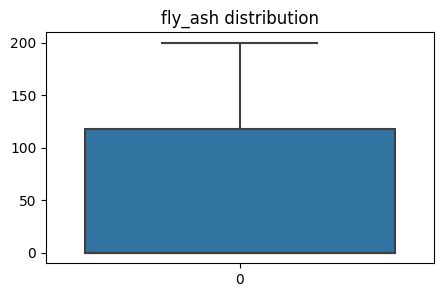

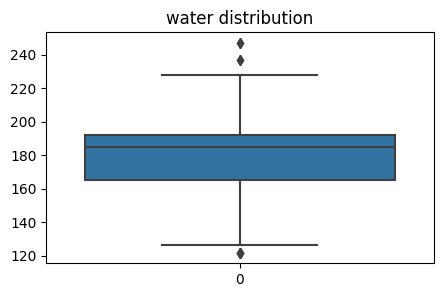

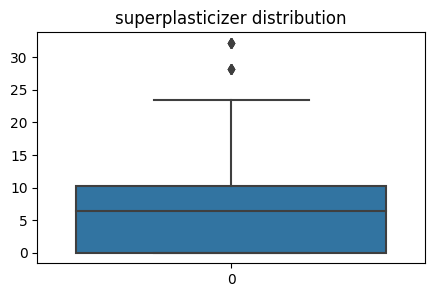

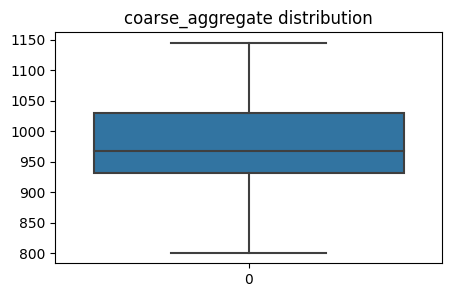

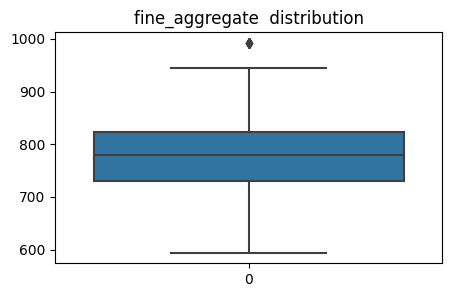

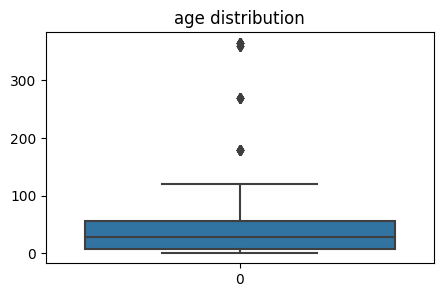

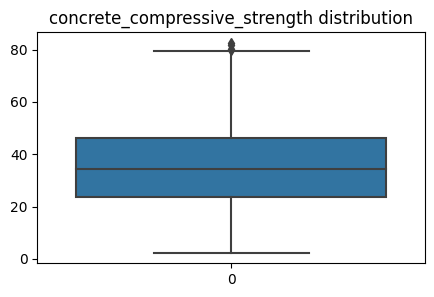

In [15]:
for i in df.columns:
    outlier(df,i)

#### Findind the min and max value for every feature

In [16]:
def end_value_show(data,column):
    print("min value of {} is {} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

In [17]:
for i in df.columns:
    end_value_show(df,i)

min value of cement is 102.0 
max value of cement is 540.0
min value of blast_furnace_slag is 0.0 
max value of blast_furnace_slag is 359.4
min value of fly_ash is 0.0 
max value of fly_ash is 200.1
min value of water is 121.8 
max value of water is 247.0
min value of superplasticizer is 0.0 
max value of superplasticizer is 32.2
min value of coarse_aggregate is 801.0 
max value of coarse_aggregate is 1145.0
min value of fine_aggregate  is 594.0 
max value of fine_aggregate  is 992.6
min value of age is 1 
max value of age is 365
min value of concrete_compressive_strength is 2.33 
max value of concrete_compressive_strength is 82.6


#### Replacing the Outliers

In [18]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

### Feature Engineering

In [19]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [20]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

In [21]:
df.columns

Index(['cement', 'fly_ash', 'water', 'superplasticizer', 'age',
       'concrete_compressive_strength'],
      dtype='object')

<Axes: >

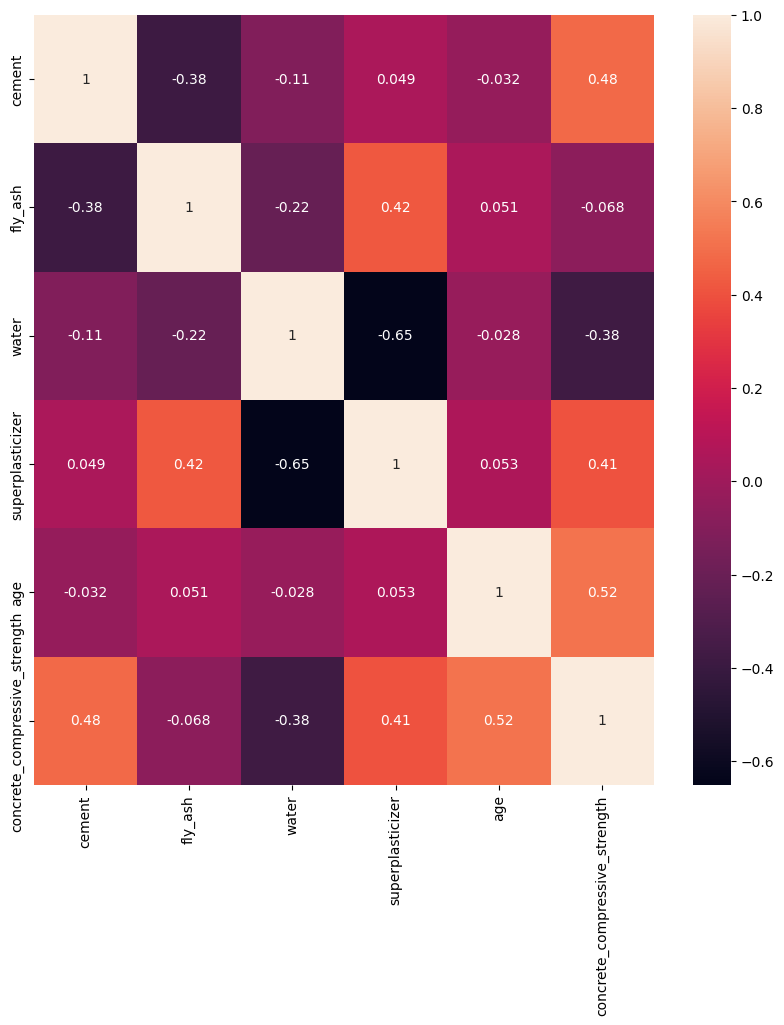

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Splitting the Data

In [23]:
x=df.drop(["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
x_train.shape

(666, 5)

## Model Building using DL

### We will be using Keras Sequential Model for this project

In [29]:
from tensorflow.keras import models,layers

In [30]:
model=models.Sequential()
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100,activation='relu',input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5,activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [31]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test))

Epoch 1/100
666/666 [==============================] - 3s 2ms/step - loss: 1437.7218 - mae: 33.9630 - val_loss: 1250.4674 - val_mae: 31.2125
Epoch 2/100
666/666 [==============================] - 1s 2ms/step - loss: 1260.9977 - mae: 31.3157 - val_loss: 1092.6992 - val_mae: 28.5960
Epoch 3/100
666/666 [==============================] - 1s 2ms/step - loss: 1095.2053 - mae: 28.4109 - val_loss: 943.6996 - val_mae: 25.9052
Epoch 4/100
666/666 [==============================] - 1s 2ms/step - loss: 946.2718 - mae: 25.8399 - val_loss: 808.3397 - val_mae: 23.2818
Epoch 5/100
666/666 [==============================] - 1s 2ms/step - loss: 804.0392 - mae: 23.1523 - val_loss: 691.6028 - val_mae: 21.0214
Epoch 6/100
666/666 [==============================] - 1s 2ms/step - loss: 693.7466 - mae: 21.2563 - val_loss: 592.9676 - val_mae: 19.1975
Epoch 7/100
666/666 [==============================] - 1s 2ms/step - loss: 610.8766 - mae: 19.6710 - val_loss: 514.6137 - val_mae: 17.6527
Epoch 8/100
666/666 [=

666/666 [==============================] - 1s 2ms/step - loss: 333.3848 - mae: 14.6868 - val_loss: 276.5680 - val_mae: 13.1514
Epoch 60/100
666/666 [==============================] - 1s 2ms/step - loss: 317.6940 - mae: 14.4917 - val_loss: 276.6293 - val_mae: 13.1466
Epoch 61/100
666/666 [==============================] - 1s 2ms/step - loss: 325.2023 - mae: 14.4355 - val_loss: 276.5176 - val_mae: 13.1555
Epoch 62/100
666/666 [==============================] - 1s 2ms/step - loss: 336.4955 - mae: 14.6249 - val_loss: 276.5758 - val_mae: 13.1508
Epoch 63/100
666/666 [==============================] - 1s 2ms/step - loss: 323.4917 - mae: 14.3078 - val_loss: 276.5282 - val_mae: 13.1547
Epoch 64/100
666/666 [==============================] - 1s 2ms/step - loss: 307.2129 - mae: 14.1394 - val_loss: 276.4941 - val_mae: 13.1576
Epoch 65/100
666/666 [==============================] - 1s 2ms/step - loss: 326.6658 - mae: 14.4316 - val_loss: 276.6657 - val_mae: 13.1439
Epoch 66/100
666/666 [===========

In [32]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 276.6207 - mae: 13.1473


[276.6206970214844, 13.147293090820312]

In [33]:
pred=model.predict(x_test)
pred[4]

9/9 [==============================] - 0s 2ms/step


array([34.09393], dtype=float32)

## Using Auto Keras

 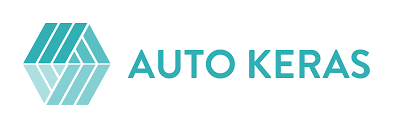

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [34]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-pa2z8afa
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-pa2z8afa
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Resolved https://github.com/keras-team/keras-tuner.git to commit 0fb69434a132093518e0e53d40020145ae192629
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 169.9 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85441 sha256=f35d7248fa5f6483806f3c3776023155b7940bbf143e7905542c9685389237c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-e6eg0ofc/wheels/b8/e6/44/4b6aa4a149abdabe9752582dbd7d7ae0848e87fe71cd2c59ed
  Created wheel for future: 

In [35]:
!pip install autokeras

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 117.7 kB/s eta 0:00:001m132.3 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 320.3 kB/s eta 0:00:00m eta 0:00:010:01:01
  Obtaining dependency information for keras-nlp>=0.4.0 from https://files.pythonhosted.org/packages/13/fc/258d2a78faaacceeaab2be1a64fbf69f77bd56d55758cd4188db3b0f71e3/keras_nlp-0.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for keras-core from https://files.pythonhosted.org/packages/33/18/5280fbfd70485fae8088a2f44647ea0d82c7dc9b80635ae2e7c578f785e0/keras_core-0.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/d1/df/460ca6171a8494fcf37af43f52f6fac23e38784bb4a26563f6fa01ef6faf/regex-2023.8.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 142

  Obtaining dependency information for tensorflow-hub>=0.8.0 from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 141.4 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 115.5 kB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 220.7 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 224.7 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 211.3 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 221.5 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 229.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip

In [36]:
!pip show autokeras

Name: autokeras
Version: 1.1.0
Summary: AutoML for deep learning
Home-page: http://autokeras.com
Author: DATA Lab, Keras Team
Author-email: jhfjhfj1@gmail.com
License: Apache License 2.0
Location: /home/kalyangopu/.local/lib/python3.10/site-packages
Requires: keras-nlp, keras-tuner, packaging, pandas, tensorflow
Required-by: 


In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

Using TensorFlow backend


In [38]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [39]:
reg.fit(x=x_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


In [40]:
# evaluate the model
mae, _  = reg.evaluate(x_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(x_test)

# get the best performing model
model = reg.export_model()


9/9 [==============================] - 0s 2ms/step


In [41]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (M  (None, 5)                 0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                192       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [42]:
yhat_test

array([[38.66249  ],
       [39.54292  ],
       [19.834578 ],
       [26.65182  ],
       [13.20479  ],
       [12.759458 ],
       [51.695953 ],
       [14.689487 ],
       [38.929    ],
       [41.5177   ],
       [17.760576 ],
       [43.864784 ],
       [45.748898 ],
       [25.096584 ],
       [36.046135 ],
       [47.00425  ],
       [48.769344 ],
       [35.047222 ],
       [67.386444 ],
       [32.68521  ],
       [63.103855 ],
       [19.085787 ],
       [56.390152 ],
       [41.44954  ],
       [15.039209 ],
       [33.392868 ],
       [24.393032 ],
       [20.462135 ],
       [37.088634 ],
       [ 7.919148 ],
       [28.94093  ],
       [27.209412 ],
       [41.301727 ],
       [60.932384 ],
       [46.06726  ],
       [65.34868  ],
       [24.151623 ],
       [57.82897  ],
       [20.99766  ],
       [38.46387  ],
       [32.414543 ],
       [46.765366 ],
       [30.014816 ],
       [54.38958  ],
       [57.83449  ],
       [37.542355 ],
       [43.65962  ],
       [21.96

In [43]:
y_test

248    44.30
469    44.28
757    18.13
826    24.39
557    17.24
       ...  
862    35.23
513    40.29
939    32.72
454    39.64
277    36.97
Name: concrete_compressive_strength, Length: 286, dtype: float64